# 1.Import Libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## 2. DataSet

In [2]:
#Load the DataSet into a DataFrame
df = pd.read_csv("data.csv")

In [3]:
#Load the frist few rows to get an initial understanding of the DataSet
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
#Load the last few rows to get an initial understanding of the DataSet
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

In [5]:
#Check how many rows and columns are in the data
df.shape

(569, 33)

In [6]:
#Display basic information to get a summary of the dataset, including the number of non-null entries and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#Check for missing values to identify any columns that need data imputation or cleaning before proceeding with analysis or modeling
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
#Check for duplicated values
df.duplicated().sum()

np.int64(0)

## 3. Data Preprocessing

In [9]:
#Convert diagnosis column to numeric values
df["diagnosis"] = df["diagnosis"].map({"M" : 1 , "B" : 0})
df

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                0.14710  ...          17.33           184.60      2019.0   
1                0.07017  ...          23.41           158.80      1956.0   
2                0.12790  ...          25.53           152.50      1709.0   
3                0.10520  ...          26.50            98.87       567.7   
4                0.10430  ...          16.67           152.20      1575.0   
..                   ...  ...            ...              ...         ...   
564              0.13890  ...          26.40           166.10      2027.0   
565              0.09791  ...          38.25           155.00      1731.0   
566              0.05302  ...          34.12           126.70      1124.0   
567              0.15200  ...          39.42           184.60      1821.0   
568              0.00000  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                  0.2654          0.4601                  0.11890   
1                  0.1860          0.2750                  0.08902   
2                  0.2430          0.3613                  0.08758   
3                  0.2575          0.6638                  0.17300   
4                  0.1625          0.2364                  0.07678   
..                    ...             ...                      ...   
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06637   
566                0.1418          0.2218

In [10]:
#Remove ID & Unnamed columns for analysis

df = df.drop(['id', 'Unnamed: 32'], axis=1)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

## 4. Exploratory Data Analysis (EDA)

In [11]:
#Display Summary Statistics to get to know the distribution of numerical features
df.describe().T #.T is for better understanding/Visualisation

count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
diagnosis                  0.000000    0.000000     1.000000     1.00000  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.72000

In [12]:
# Analysis of categorical and numerical variables
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=[np.number]).columns

print("\nCategorical Variables:", categorical_features)
print("Numeric Variables:", numerical_features)


Categorical Variables: Index([], dtype='object')
Numeric Variables: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Uni-Variate Analaysis

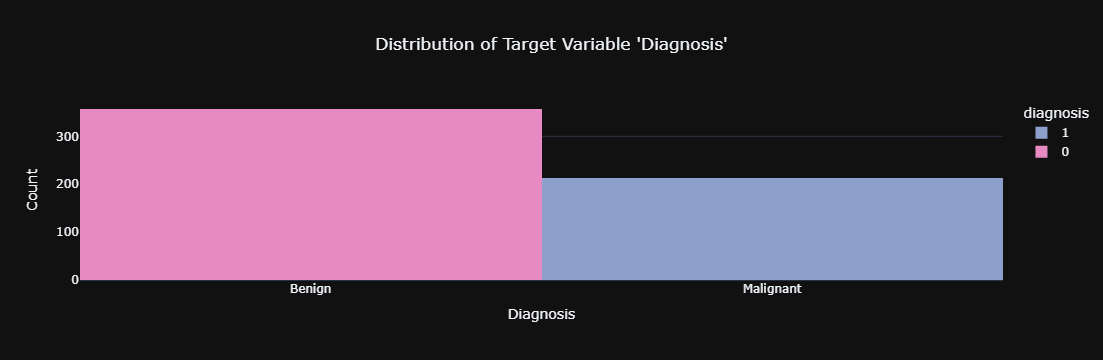

In [13]:
# Histogram for Target Value "Diagnosis"

fig = px.histogram(df, 
                   x='diagnosis', 
                   color='diagnosis', 
                   category_orders={'diagnosis': ['B', 'M']},  # Order the categories
                   color_discrete_sequence=px.colors.qualitative.Set2,  # Color scheme
                   title="Distribution of Target Variable 'Diagnosis'", # Plot title
                   template = "plotly_dark" #Dark theme
                  )   

# Updating layout for better visualization
fig.update_layout(
    xaxis_title='Diagnosis',  # Label for the x-axis
    yaxis_title='Count',  # Label for the y-axis
    xaxis=dict(
        tickvals=[0, 1],  # Values for x-axis ticks
        ticktext=['Benign', 'Malignant']  # Text for x-axis ticks
    ),
    title=dict(
        text="Distribution of Target Variable 'Diagnosis'",  # Title text
        x=0.5  # This is to position the title to the center
    ),

)


fig.show()

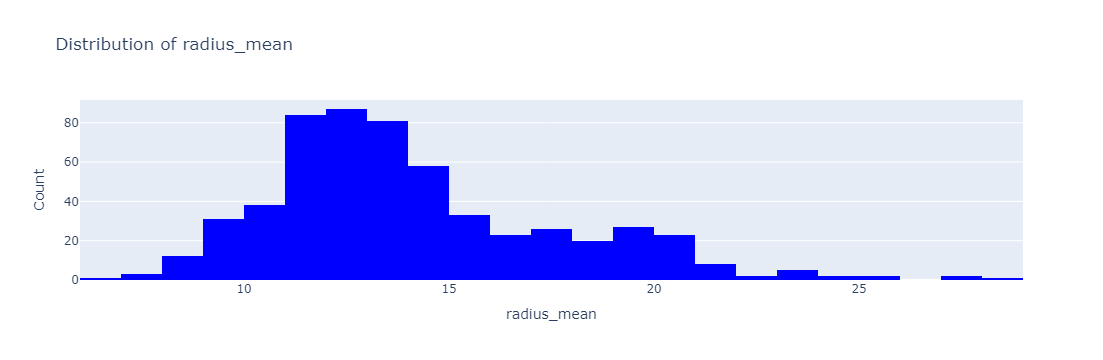

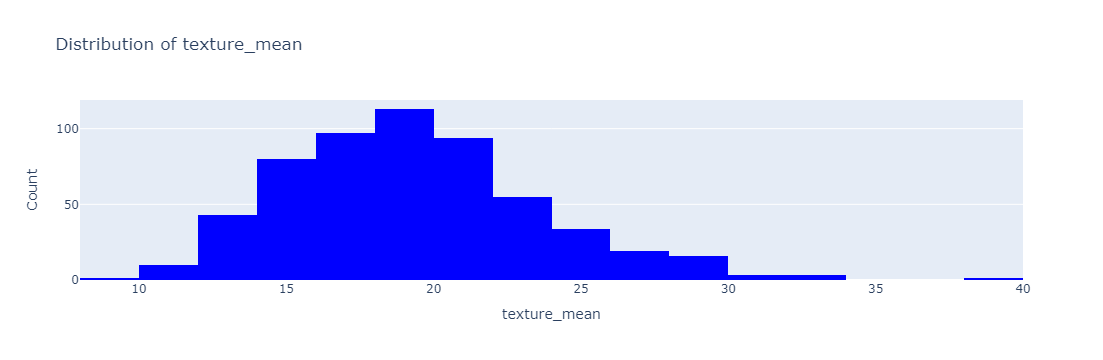

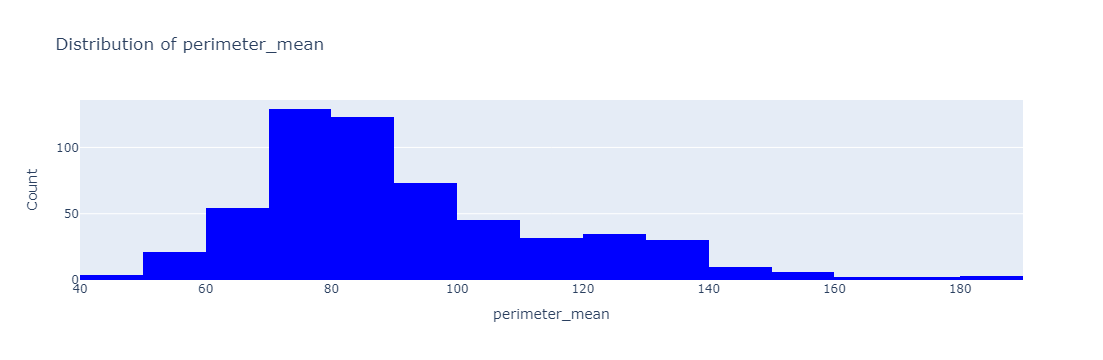

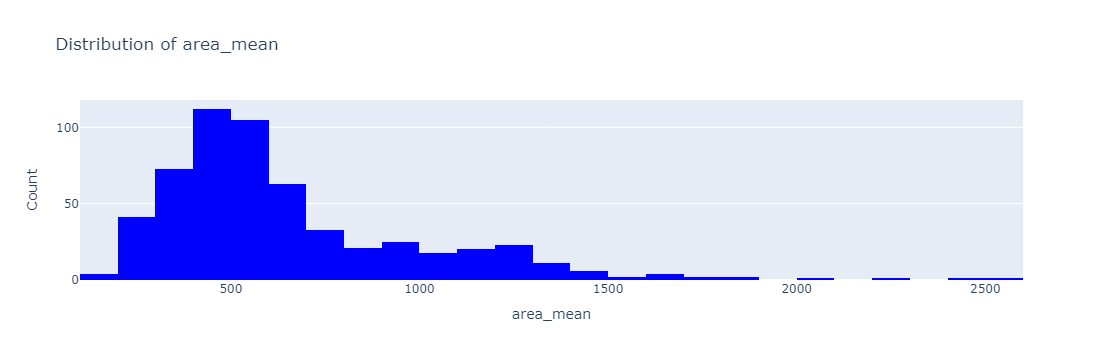

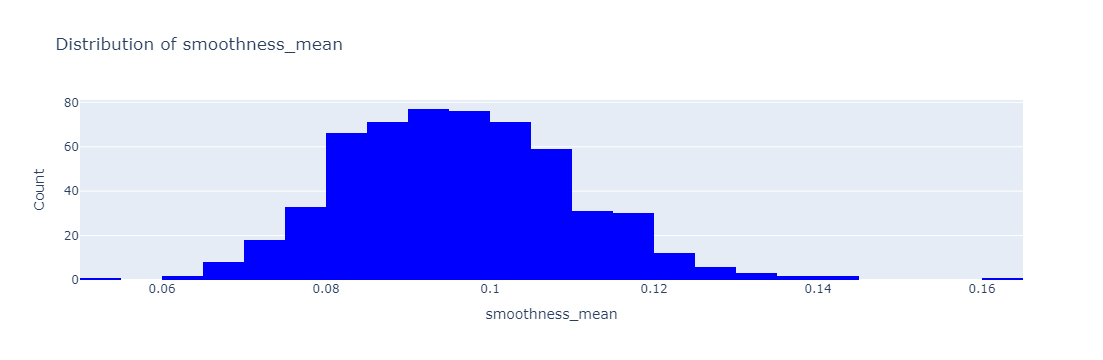

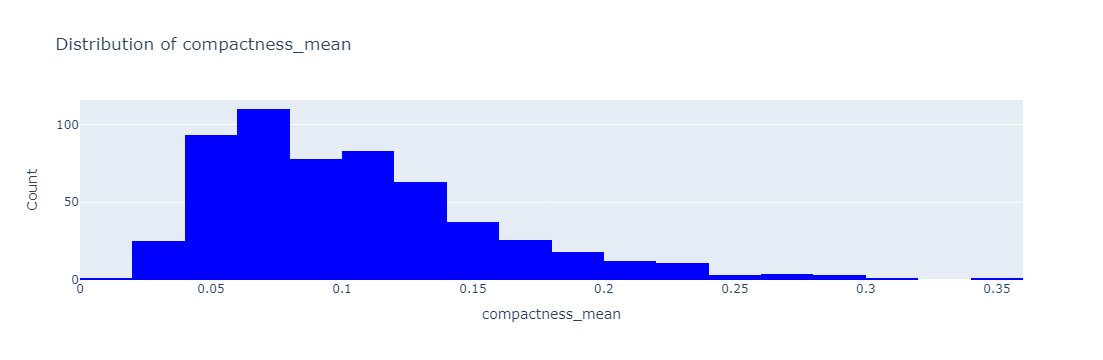

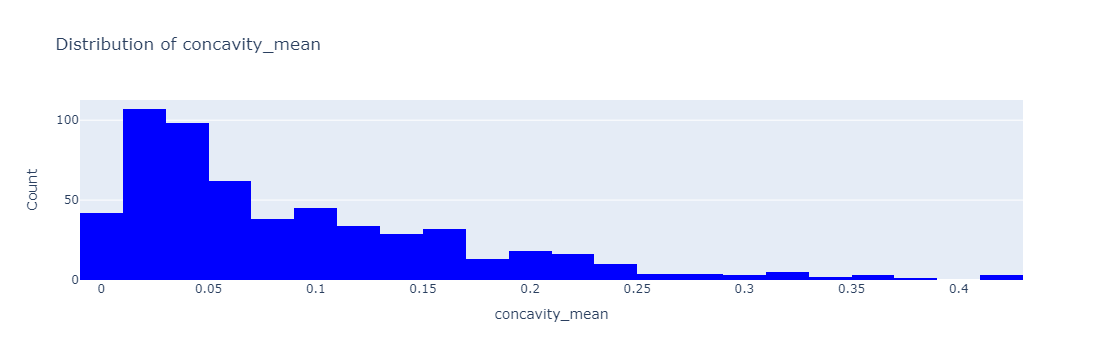

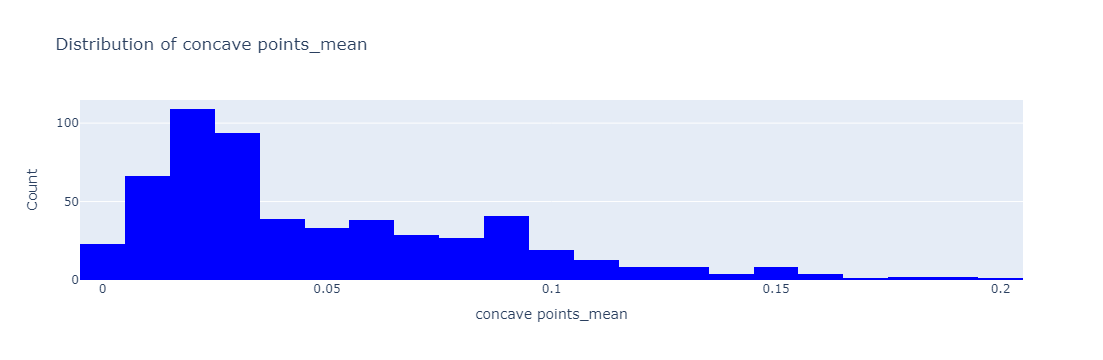

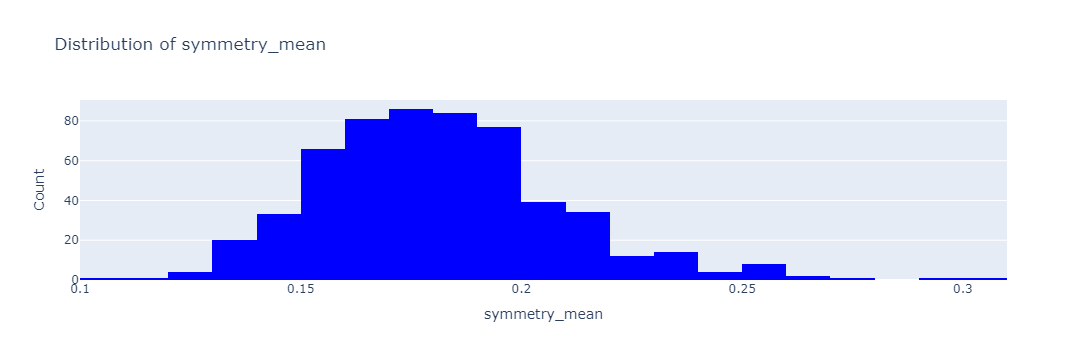

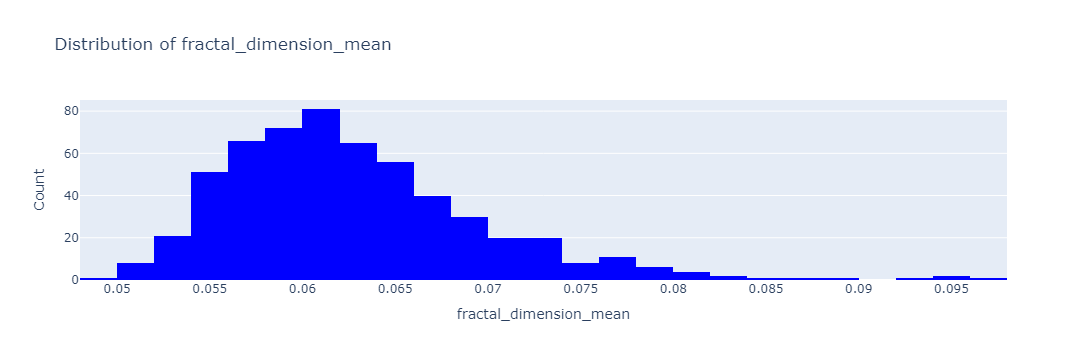

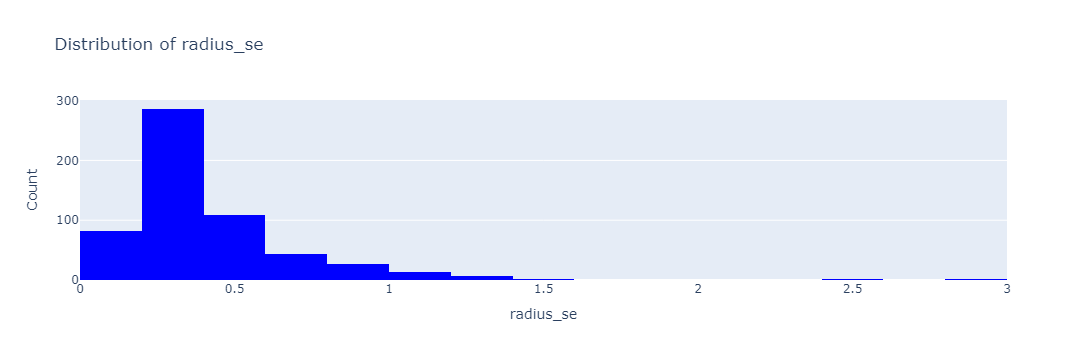

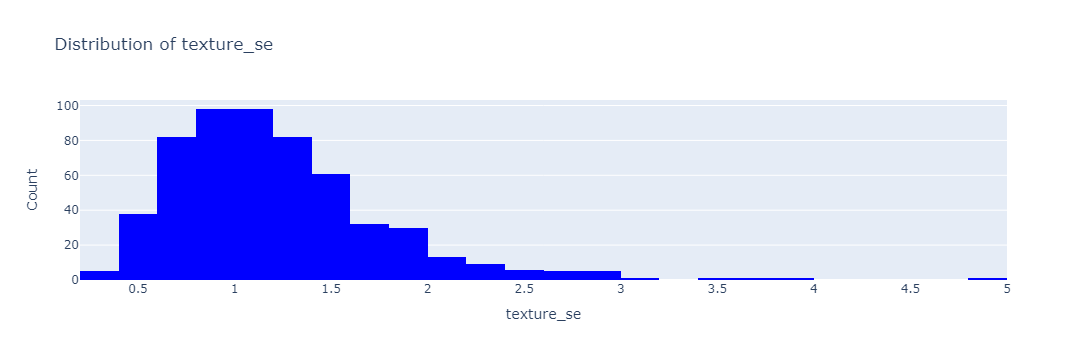

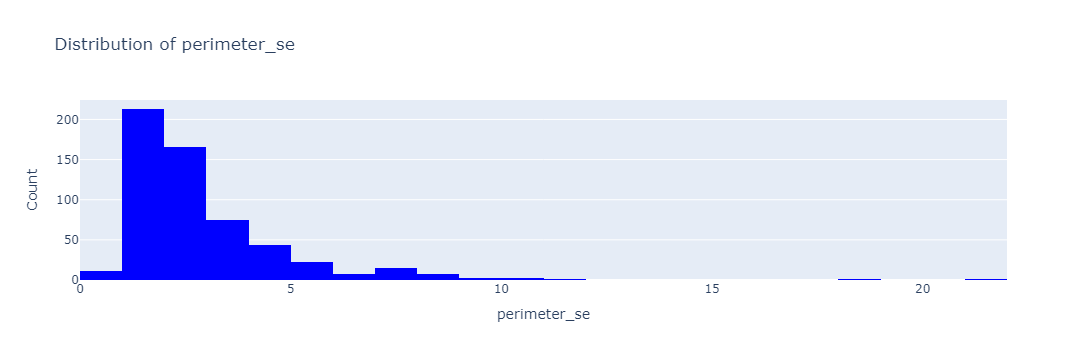

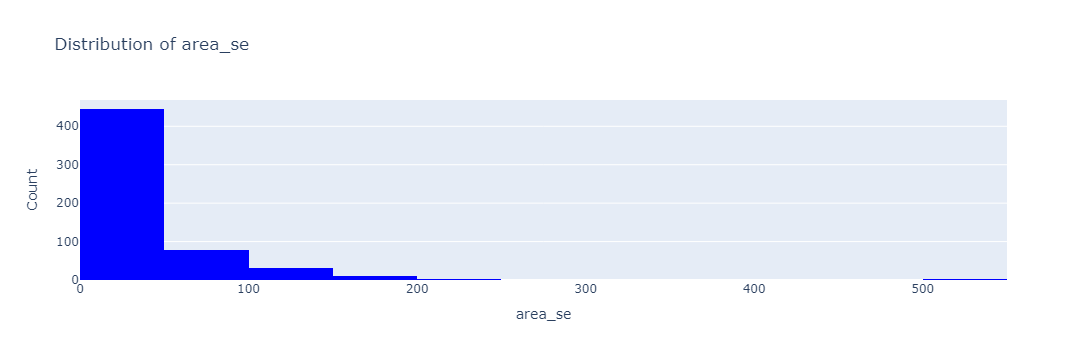

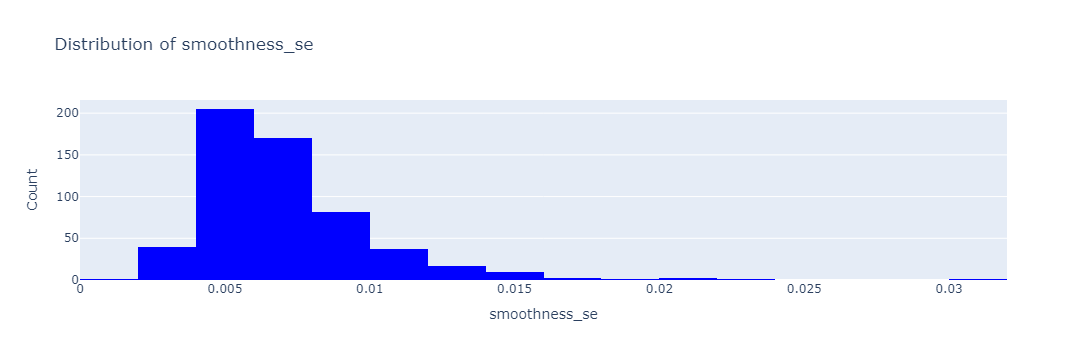

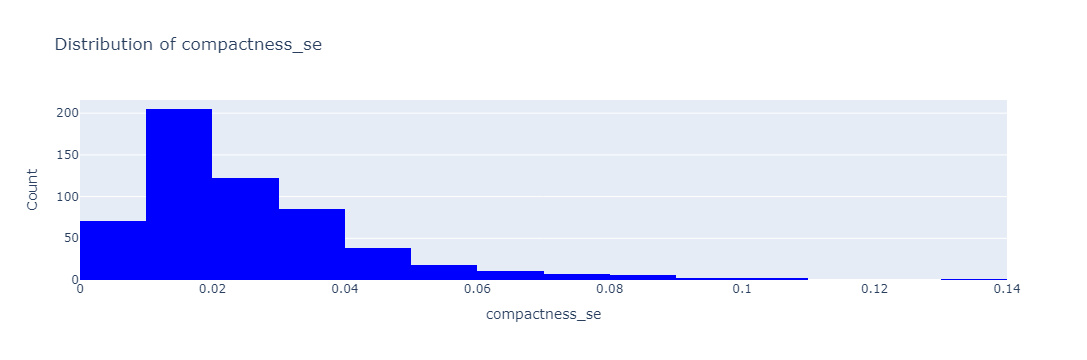

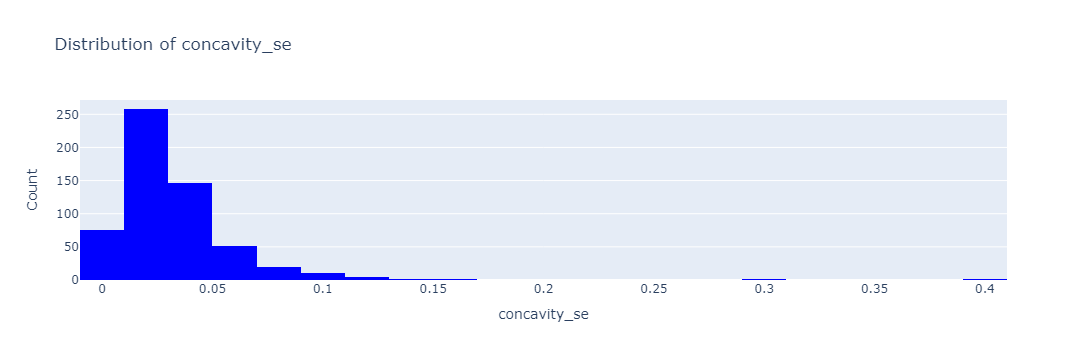

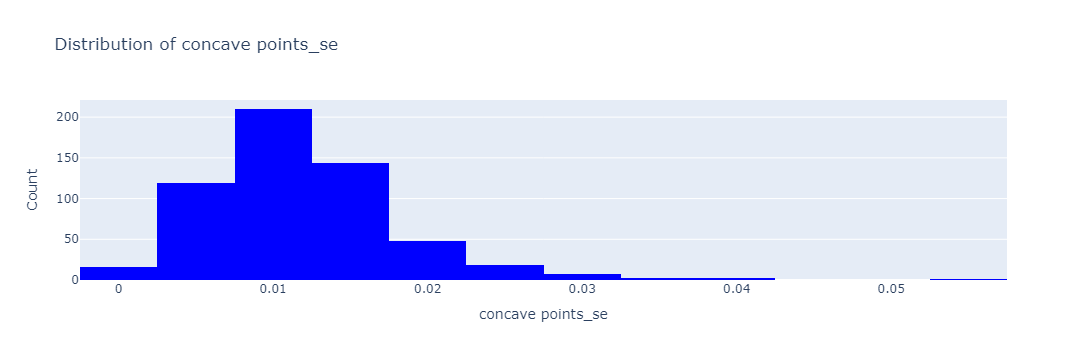

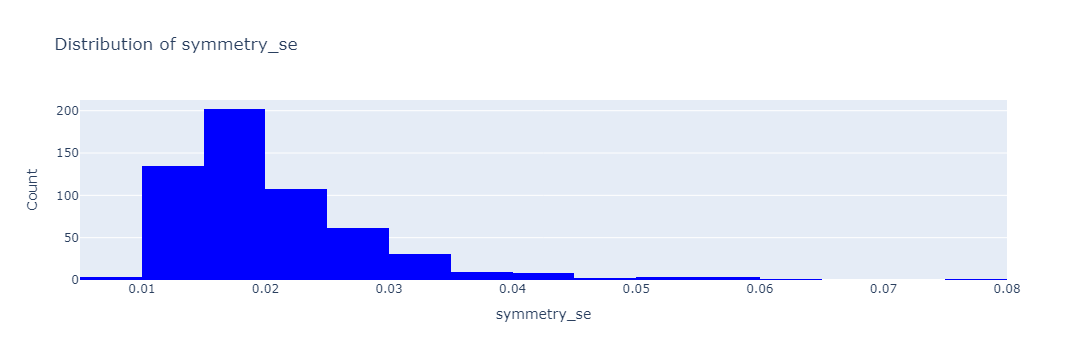

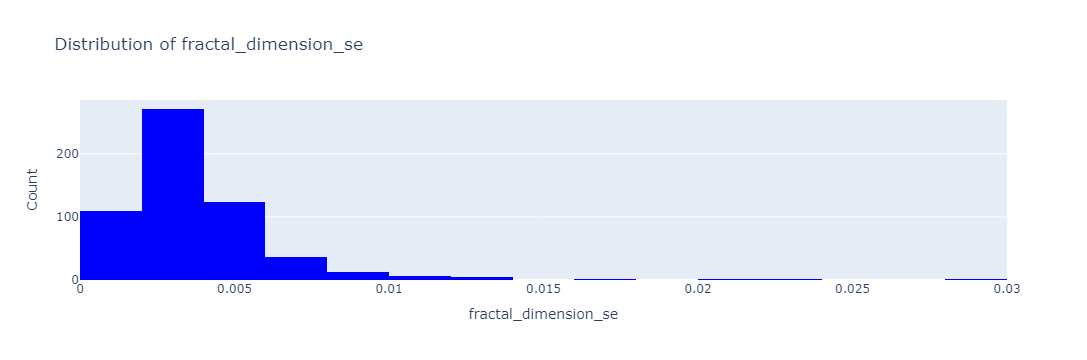

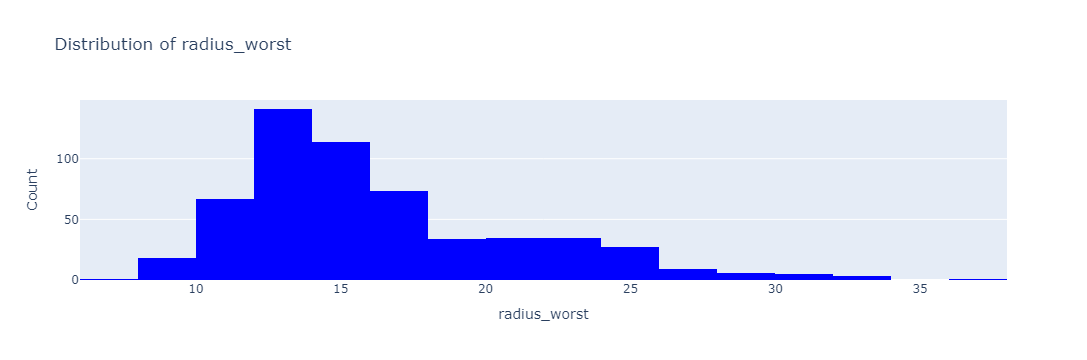

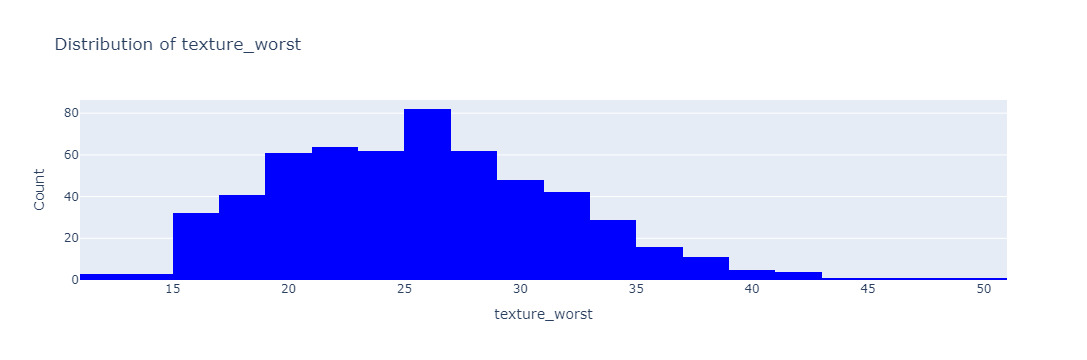

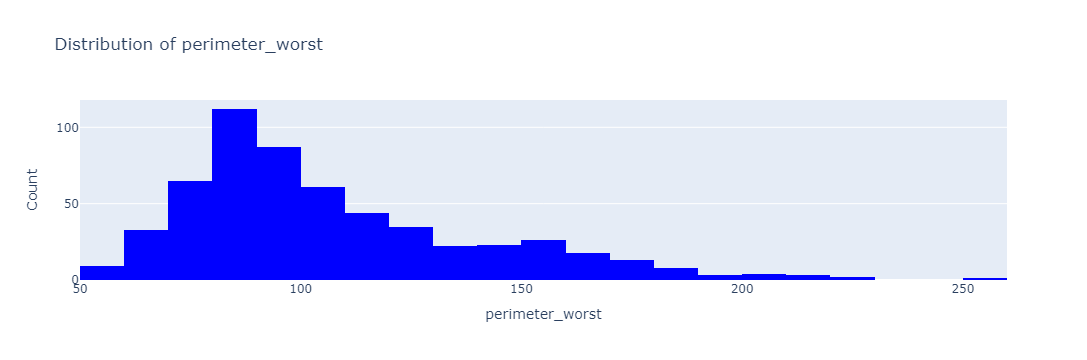

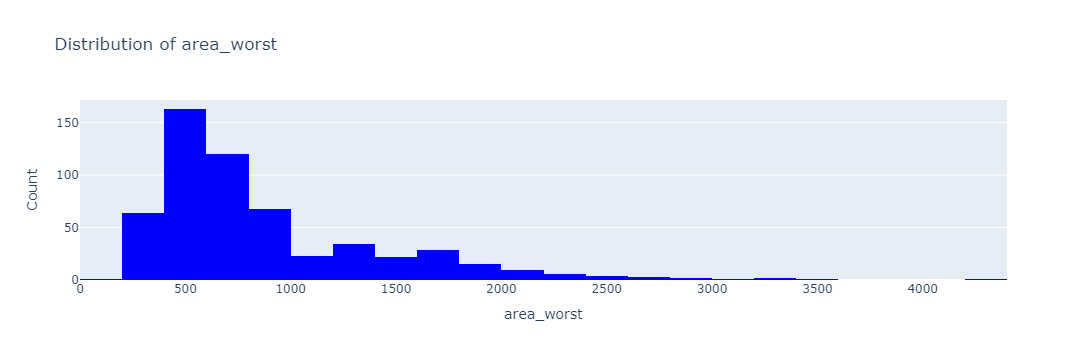

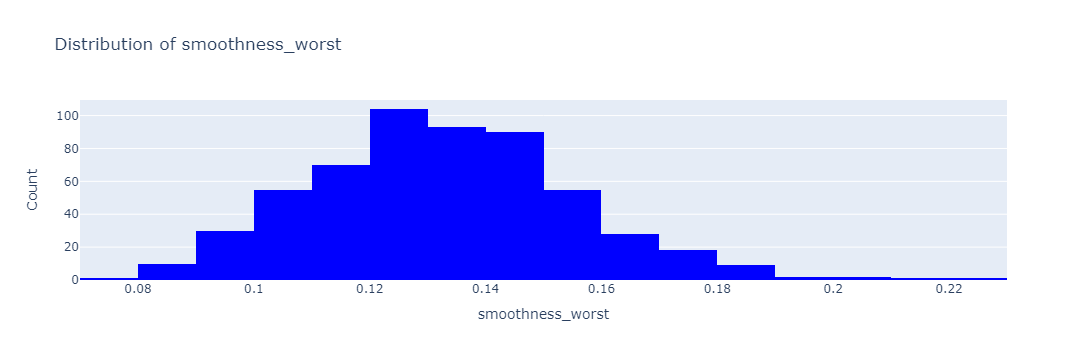

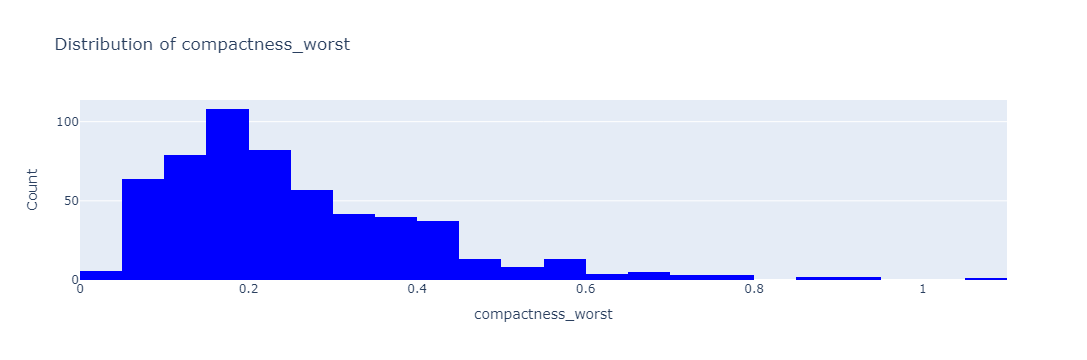

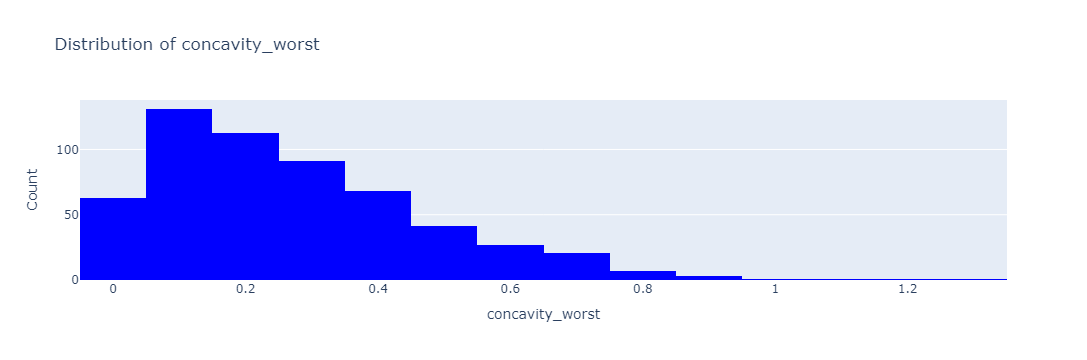

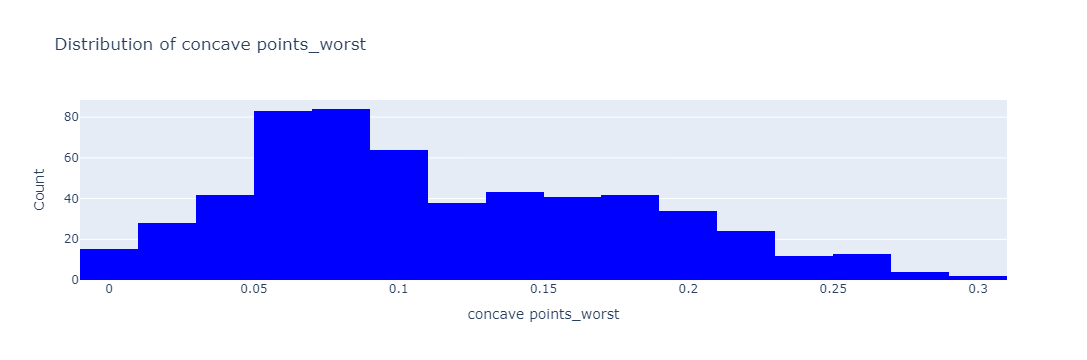

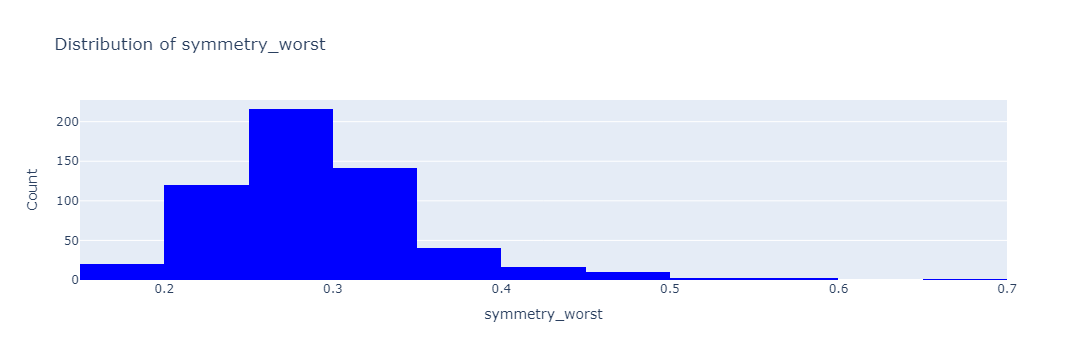

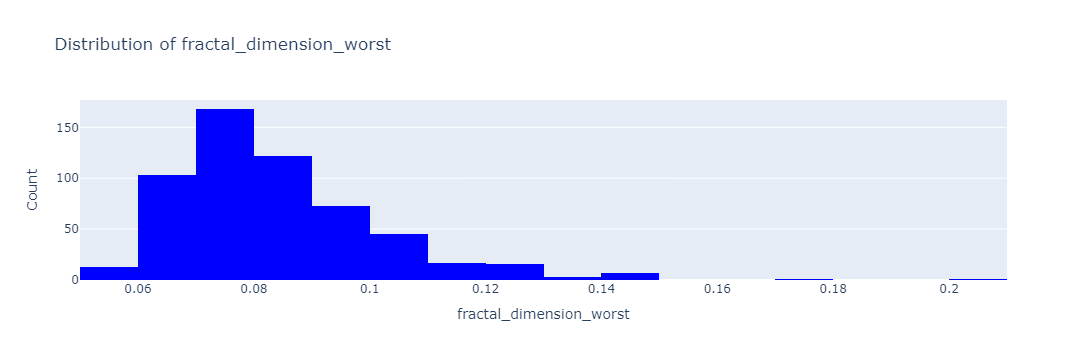

In [14]:
# Listing all features (excluding 'Diagnosis')
features = df.columns[1:]

# Creating and displaying a histogram for each feature
for feature in features:
    fig = px.histogram(df, x=feature, nbins=25, 
                       title=f'Distribution of {feature}',
                       color_discrete_sequence=['blue'],
                    
                      )
    fig.update_layout(
        xaxis_title=feature,
        yaxis_title='Count'
    )
    fig.show()

### Bi-Variate Analaysis

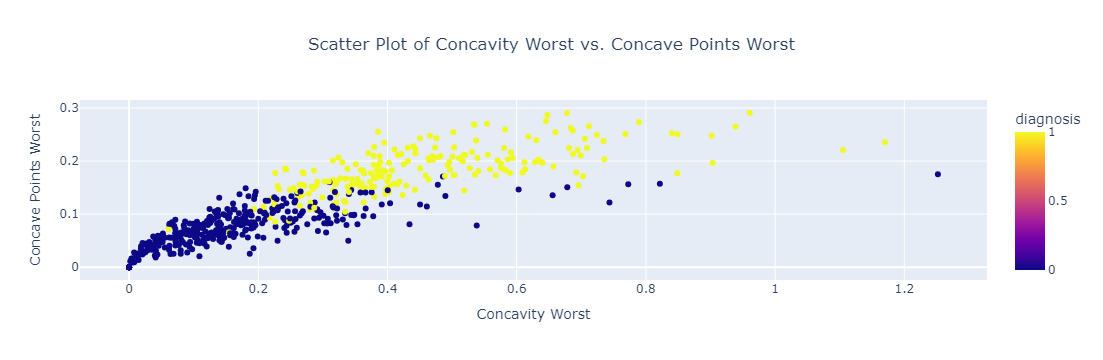

In [15]:
#Scatter plot of Concavity Worst vs. Concave Points Worst
fig = px.scatter(df, x='concavity_worst', y='concave points_worst', color='diagnosis',
                 title='Scatter Plot of Concavity Worst vs. Concave Points Worst')

# Updating layout for better visualization
fig.update_layout(
    xaxis_title='Concavity Worst',
    yaxis_title='Concave Points Worst',
    legend_title='Diagnosis',
    title=dict(
        text='Scatter Plot of Concavity Worst vs. Concave Points Worst',
        x=0.5 #To center the title
    )
)

# Show the figure
fig.show()

### Scatter Plot Summary:
- This scatter plot visualizes the relationship between 'concavity_worst' and 'concave points_worst' in breast cancer patients.
- Each point represents a patient, with color indicating the diagnosis: 'Benign' (Dark Blue or 0) or 'Malignant' (Yellow or 1).
- The plot helps to identify patterns or clusters in the data:
- Points with higher values in both features may indicate a higher likelihood of malignancy.
- By examining the distribution, we can see if there's a clear separation between benign and malignant cases based on these features.
- This visualization aids in understanding the characteristics of different diagnoses and can support feature analysis and model building.


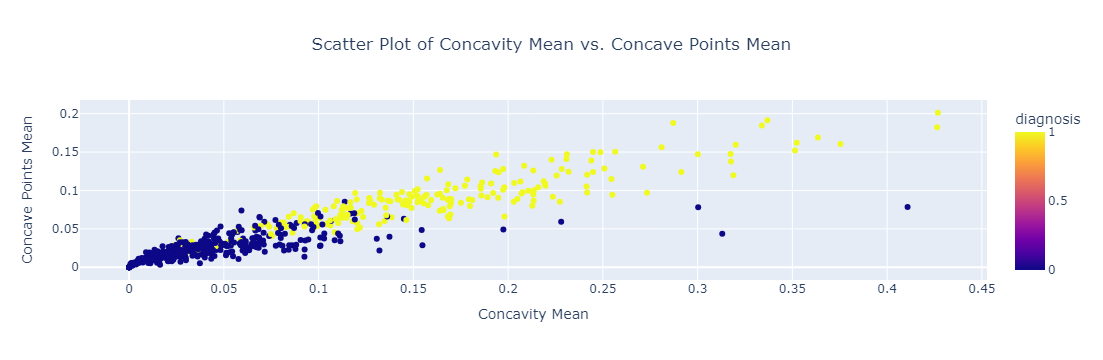

In [16]:
# Scatter Plot of Concavity Mean vs. Concave Points Mean
fig = px.scatter(df, x='concavity_mean', y='concave points_mean', color='diagnosis',
                 title='Scatter Plot of Concavity Mean vs. Concave Points Mean')

# Updating layout for better visualization
fig.update_layout(
    xaxis_title='Concavity Mean',
    yaxis_title='Concave Points Mean',
    legend_title='Diagnosis',
    title=dict(
        text='Scatter Plot of Concavity Mean vs. Concave Points Mean',
        x=0.5 # To center the title
    )
)

# Show the figure
fig.show()

### Scatter Plot Summary:
- This scatter plot visualizes the relationship between 'concavity_mean' and 'concave points_mean' in breast cancer patients.
- Each point represents a patient, with color indicating the diagnosis: 'Benign' (Dark Blue or 0) or 'Malignant' (Yellow or 1).
- The plot helps to identify patterns or clusters in the data:
- Points with higher values in both features may suggest a higher likelihood of malignancy.
- By examining the distribution, we can see if there's a clear separation between benign and malignant cases based on these features.
- This visualization aids in understanding how the mean values of these features relate to the diagnosis and supports feature analysis and model building.


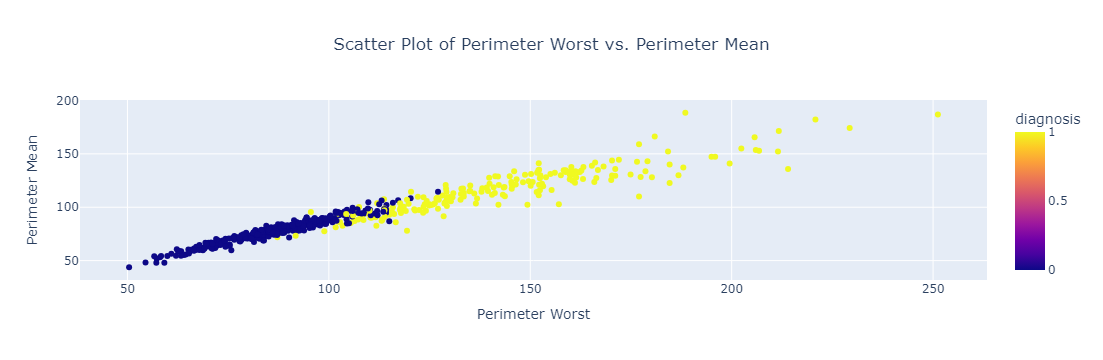

In [17]:
# Scatter Plot of Perimeter Worst vs. Perimeter Mean
fig = px.scatter(df, x='perimeter_worst', y='perimeter_mean', color='diagnosis',
                 title='Scatter Plot of Perimeter Worst vs. Perimeter Mean')

# Updating layout for better visualization
fig.update_layout(
    xaxis_title='Perimeter Worst',
    yaxis_title='Perimeter Mean',
    legend_title='Diagnosis',
    title=dict(
        text='Scatter Plot of Perimeter Worst vs. Perimeter Mean',
        x=0.5 # To center the title
    )
)

# Show the figure
fig.show()


### Scatter Plot Summary:
- This scatter plot visualizes the relationship between 'perimeter_worst' and 'perimeter_mean' in breast cancer patients.
- Each point represents a patient, with color indicating the diagnosis: 'Benign' (Dark Blue or 0) or 'Malignant' (Yellow or 1).
- The plot helps to identify patterns or clusters in the data:
- Points with higher values in both features may suggest a higher likelihood of malignancy.
- By examining the distribution, we can see if there's a clear separation between benign and malignant cases based on these features.
- This visualization aids in understanding how the worst and mean values of perimeter relate to the diagnosis and supports feature analysis and model building.


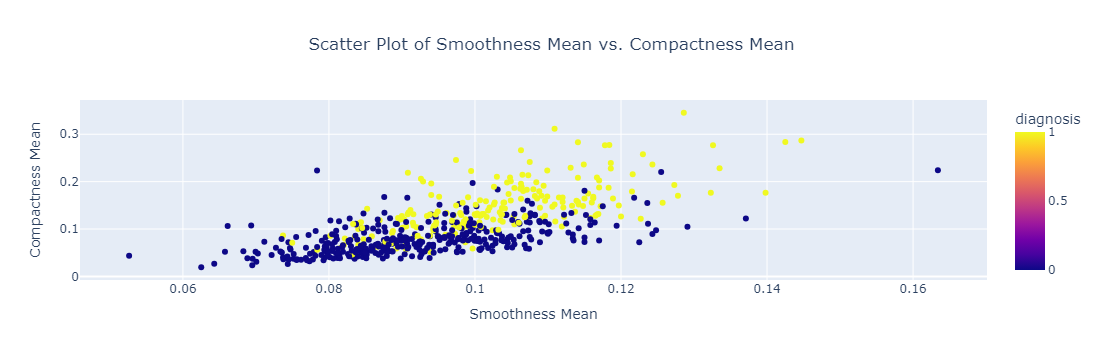

In [18]:
# Scatter Plot of Smoothness Mean vs. Compactness Mean
fig = px.scatter(df, x='smoothness_mean', y='compactness_mean', color='diagnosis',
                 title='Scatter Plot of Smoothness Mean vs. Compactness Mean')

# Updating layout for better visualization
fig.update_layout(
    xaxis_title='Smoothness Mean',
    yaxis_title='Compactness Mean',
    legend_title='Diagnosis',
    title=dict(
        text='Scatter Plot of Smoothness Mean vs. Compactness Mean',
        x=0.5 # To center the title
    )
)

# Show the figure
fig.show()


### Scatter Plot Summary:
- This scatter plot visualizes the relationship between 'smoothness_mean' and 'compactness_mean' in breast cancer patients.
- Each point represents a patient, with colors indicating the diagnosis:
- Blue represents 'Benign'
- Yellow represents 'Malignant'
- The plot helps to identify patterns or clusters in the data:
- Higher values in both 'smoothness_mean' and 'compactness_mean' may suggest a higher likelihood of malignancy.
- By examining the distribution, we can see if there's a clear separation between benign and malignant cases based on these features.
- This visualization aids in understanding how the mean values of smoothness and compacttness relate to the diagnosis and supports feature analysis and model building.


### Multi-variate Analysis

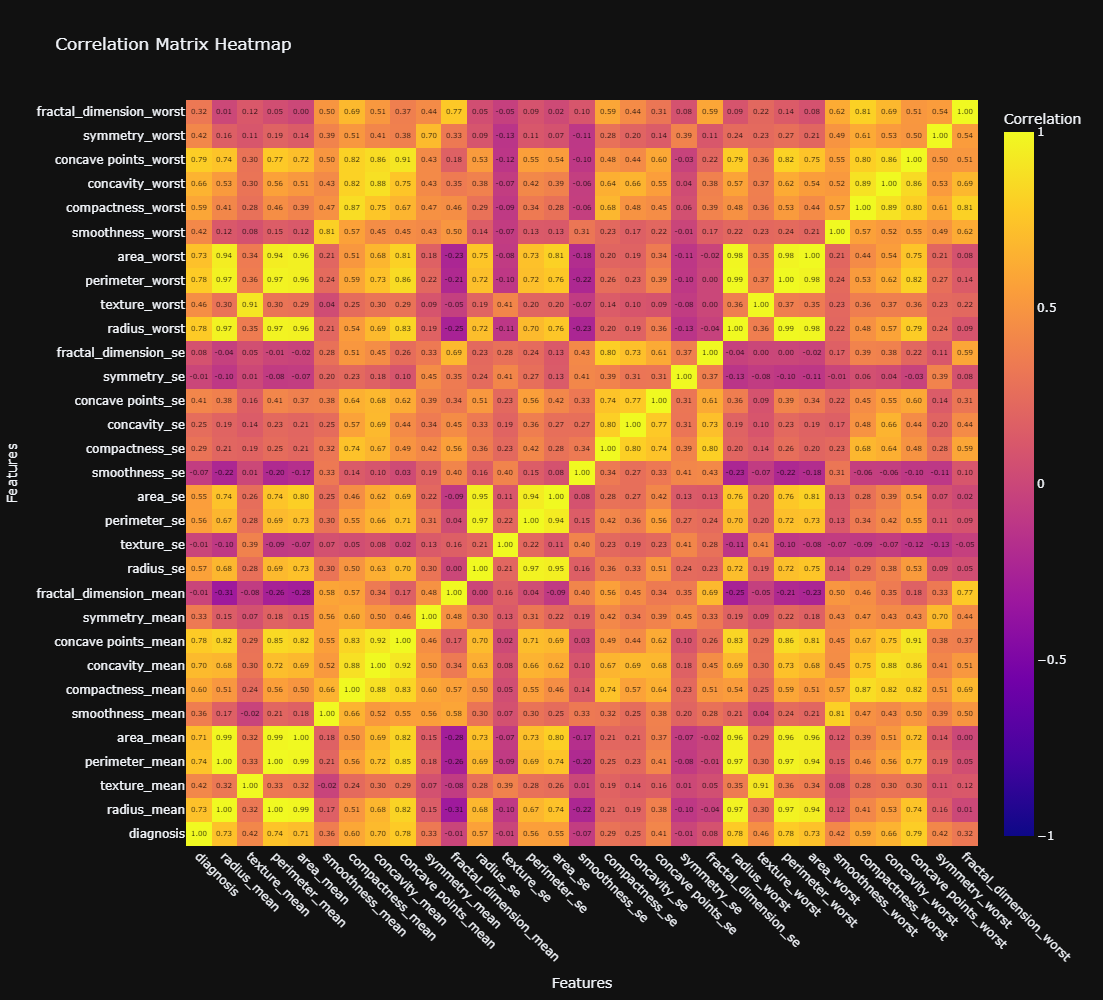

In [19]:
# Calculate the correlation matrix
data_corr = df.corr() #Our data contains only numeric so no need to filter based on numeric

# Creating a heatmap
fig = go.Figure(data=go.Heatmap(
    z=data_corr.values,  # Correlation matrix values
    x=data_corr.columns,  # Column labels
    y=data_corr.index,  # Row labels
    colorscale='plasma',  # Adjusting colorscale
    zmin=-1,  # Minimum correlation value
    zmax=1,  # Maximum correlation value
    colorbar=dict(title="Correlation"),  # Colorbar title
    text=data_corr.values,  # Setting the text to show correlation values
    texttemplate="%{text:.2f}",  # Formatting the text to show 2 decimal places
    textfont=dict(color="black")  # Setting the text color to black
))

# Customizing the layout
fig.update_layout(
    title='Correlation Matrix Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickangle=45),  # Rotating x-axis labels for better readability
    yaxis=dict(tickangle=0),
    template='plotly_dark',
    width=1000,  # Width of the figure
    height=1000  # Height of the figure
)

# Showing the figure
fig.show()


### Some important insights from the heatmap
#### Correlation with diagnosis:
- Radius Mean (0.73), Perimeter Mean (0.74), Area Mean (0.71), Perimeter worst (0.78), Radius worst (0.78), and Area worst (0.74) show strong positive correlations with malignancy, indicating that larger tumor sizes are likely to be malignant.
- Concavity Mean (0.70) and Concave Points Mean (0.78) also exhibit strong positive correlations, suggesting that tumors with more observed concavity features are likely malignant.
#### Business implications:
- Feature importance: The identified features with strong correlations should be prioritized in diagnostic models for breast cancer.
- Clinical decisions: High values in these features require closer examination and may need additional testing for patients.

### Let's investigate these high correlations
#### Radius mean & Area_mean & Perimeter mean#### perimeter worst &Rradius worst &Aarea_worst

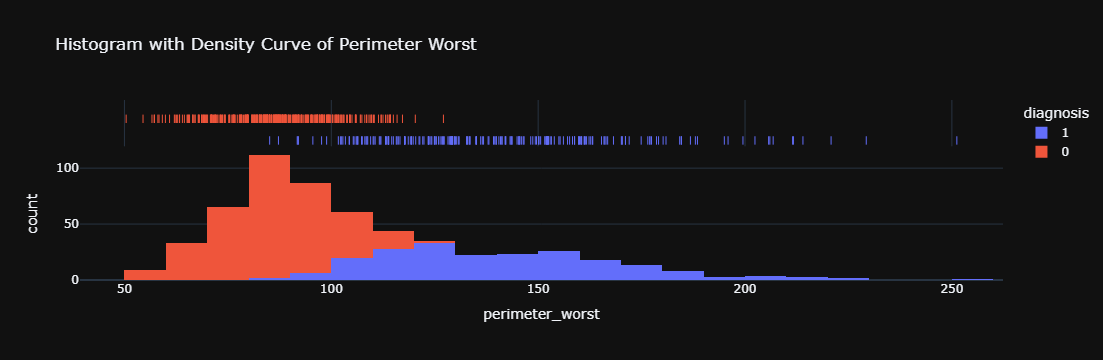

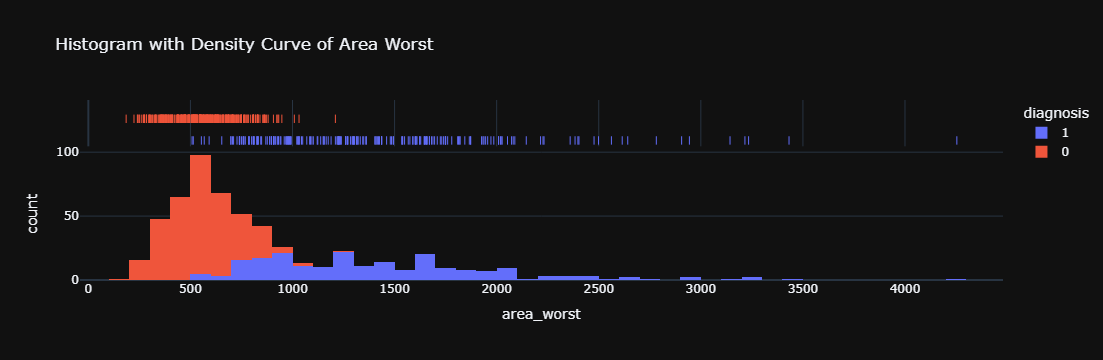

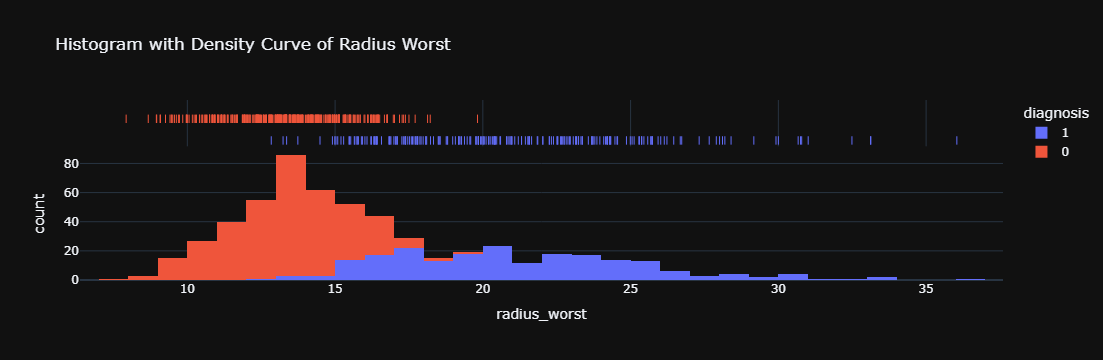

In [20]:
#I will create histograms with density curves for each individual feature

# Histogram with density curve for 'perimeter_worst'
fig1 = px.histogram(df, x='perimeter_worst', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Perimeter Worst',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig1.show()

# Histogram with density curve for 'area_worst'
fig2 = px.histogram(df, x='area_worst', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Area Worst',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig2.show()

# Histogram with density curve for 'radius_worst'
fig3 = px.histogram(df, x='radius_worst', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Radius Worst',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig3.show()


In [21]:
# Step 2: I will combine the features and plot the combined histogram with density curve in the feature engineering section

### Summary:
- I created histograms with density curves to visualize the distribution of three key features: 
- 'perimeter_worst', 'area_worst', and 'radius_worst' in the dataset. These plots help in understanding 
- how these features differ between the diagnosis classes (malignant and benign). 
- To further explore whether combining these features enhances the separation between the classes, 
- I will create a new feature, 'combined_worst', by summing 'perimeter_worst', 'area_worst', and 'radius_worst'. 
- I will then plotted a histogram with a density curve for this combined feature.

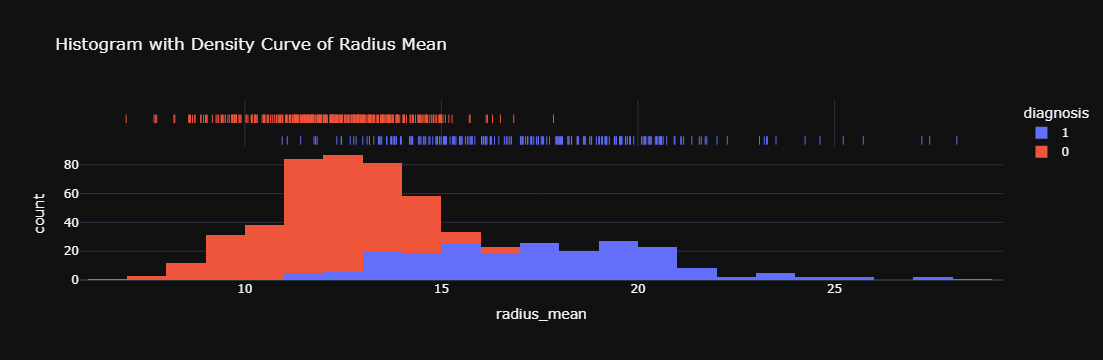

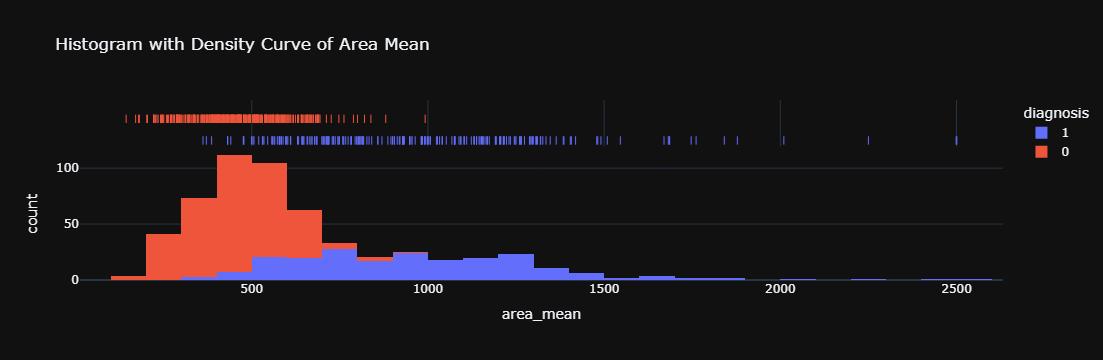

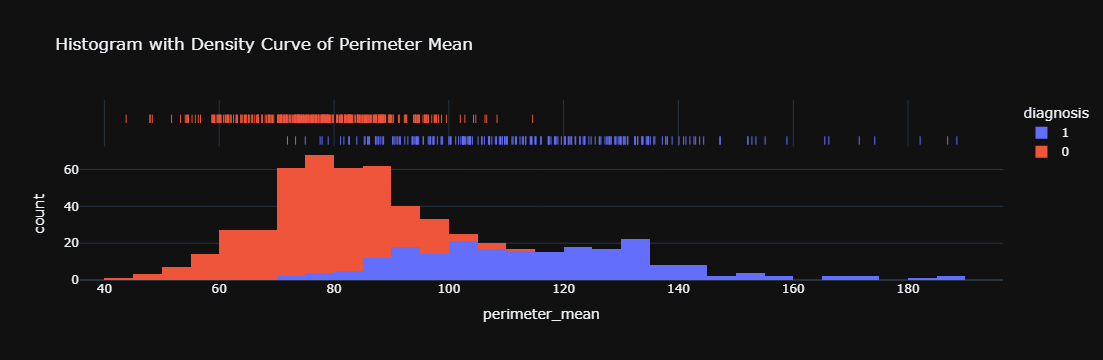

In [22]:
# Step 1: I will create histograms with density curves for each individual feature

# Histogram with density curve for 'perimeter_worst'
fig1 = px.histogram(df, x='radius_mean', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Radius Mean',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig1.show()

# Histogram with density curve for 'area_worst'
fig2 = px.histogram(df, x='area_mean', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Area Mean',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig2.show()

# Histogram with density curve for 'radius_worst'
fig3 = px.histogram(df, x='perimeter_mean', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Perimeter Mean',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig3.show()


In [23]:
# Step 2: I will combine the features and plot the combined histogram with density curve in the feature engineering section

### Summary:
- I created histograms with density curves to visualize the distribution of three key features: 
- 'perimeter_mean', 'area_mean', and 'radius_mean' in the dataset. These plots help in understanding 
- how these features differ between the diagnosis classes (malignant and benign). 
- To further explore whether combining these features enhances the separation between the classes, 
- I will create a new feature, 'combined_mean', by summing 'perimeter_mean', 'area_mean', and 'radius_mean' in the feature engineering section. 
- I will then plotted a histogram with a density curve for this combined feature.

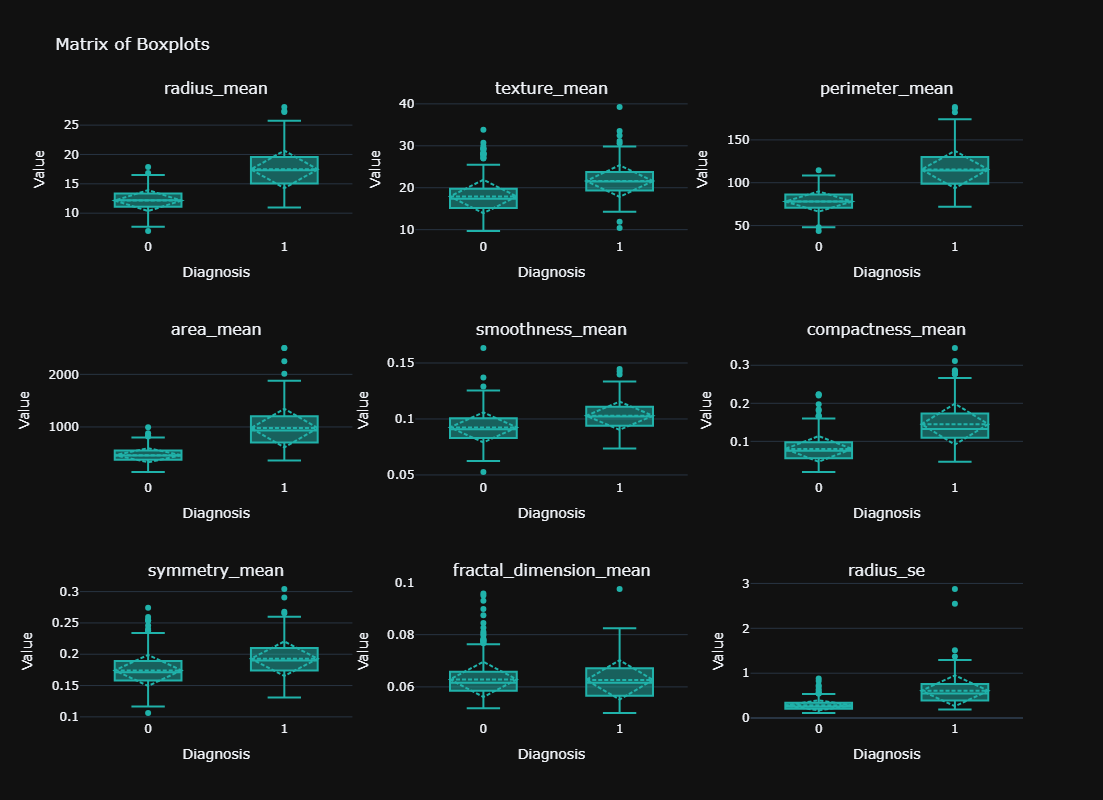

In [24]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

#Reference: https://plotly.com/python/box-plots/#box-plot-with-gobox

# Selecting variables for boxplots
selected_features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", 
                     "smoothness_mean", "compactness_mean", "symmetry_mean", 
                     "fractal_dimension_mean", "radius_se"]

# Creating a 3x3 grid of subplots
fig = make_subplots(rows=3, cols=3, subplot_titles=selected_features)

# Adding boxplots to each subplot
for i, feature in enumerate(selected_features):
    row, col = divmod(i, 3)
    fig.add_trace(
        go.Box(x=df['diagnosis'], y=df[feature], boxmean='sd', 
               name=feature, marker_color='lightseagreen'),
        row=row+1, col=col+1
    )

# Update layout
fig.update_layout(height=800, width=1000, showlegend=False, title_text="Matrix of Boxplots", template='plotly_dark')
fig.update_xaxes(title_text="Diagnosis")
fig.update_yaxes(title_text="Value")

# Show plot
fig.show()


### Summary of the Box Plots
#### The following boxplots illustrate the distribution of different features from the breast cancer diagnosis dataset, categorized by diagnosis (benign or malignant). Boxplots are effective for showing feature distributions, including their medians, quartiles, and outliers.

#### Analyzed Features:
- radius_mean
- texture_mean
- perimeter_mean
- area_mean
- smoothness_mean
- compactness_mean
- symmetry_mean
- fractal_dimension_mean
- radius_se
- Key Elements of Boxplots:
- Box: Displays the interquartile range (IQR), covering the central 50% of the data.
- Median Line: The line within the box, representing the median value (Q2).
- Box Edges: Indicate the first quartile (Q1) and third quartile (Q3).
- Whiskers: Extend from the box to the smallest and largest values within 1.5 * IQR from Q1 and Q3, respectively.
- Outliers: Points that fall outside the whiskers' range.

- (0): Represents benign samples.
- (1): Represents malignant samples.
#### Interpretation of Features:
#### radius_mean:

- Malignant tumors generally have a higher median value compared to benign ones.
- The malignant tumors show greater variability with higher maximum values and more outliers.

#### texture_mean:

- The median for malignant tumors is slightly higher, but there is significant overlap between classes.
- Both benign and malignant classes have several outliers.

#### perimeter_mean:

- Malignant tumors exhibit a higher median value.
- The distribution is broader in malignant cases, with higher maximum values and several outliers.

#### area_mean:

- A notably higher median value is observed in malignant tumors.
- Malignant tumors show greater variability and numerous outliers.

#### smoothness_mean:

- The median is slightly higher for malignant tumors, but there is considerable overlap and several outliers.

#### compactness_mean:

- Malignant tumors have a higher median value.
- The distribution for malignant tumors is wider with more outliers.

#### symmetry_mean:

- Malignant tumors tend to have a slightly higher median.
- There is significant overlap and a presence of outliers in both classes.

#### fractal_dimension_mean:

- The median is marginally higher in malignant tumors.
- Considerable overlap and several outliers are observed.

#### radius_se:

- Malignant tumors have a higher median.
- The variability is greater with several outliers in malignant cases.


#### Conclusion:
#### Discriminative Features:

- radius_mean, perimeter_mean, area_mean, compactness_mean, and radius_se are key features that distinguish malignant tumors due to their significantly higher mean values.
- Features like texture_mean, smoothness_mean, symmetry_mean, and fractal_dimension_mean show some overlap but still have median differences that are useful.

#### Implications for Diagnosis:

- Features with higher values in radius_mean, perimeter_mean, and area_mean are particularly important for distinguishing between benign and malignant tumors.

- The greater variability and higher maximum values of these features in malignant tumors suggest they are strong indicators of malignancy.
#### Diagnostic Modeling:

- Machine learning models should focus on these key features to enhance breast cancer diagnosis accuracy.
- Addressing the variability and outliers in these features can improve the model’s ability to detect malignant tumors.
#### Clinical Application:

- Patients exhibiting high values in features such as radius_mean, perimeter_mean, and area_mean should be monitored closely due to their strong association with malignancy.
- Automated screening tools can use these features to prioritize more in-depth examinations for individuals at higher risk.


- I am currently keeping the outliers in the dataset as they do not significantly skew the data and are relatively close to the upper fence. 
- I will use models that are robust to outliers or apply transformations to manage them effectively in future analyses. 
- If I observe significant performance issues due to these outliers or find them to be errors, I may consider removing them later.

### 5. Data Cleaning

In [25]:
# Checking for missing values
print("Number of missing values ​​per column:")
print(df.isnull().sum())

Number of missing values ​​per column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [26]:
# If there were missing values, we could fill them with the mean, median or mode depending on the type of variable

In [27]:
# Checking for duplicates:
df.duplicated().sum()

np.int64(0)

### 6. Feature Engineering

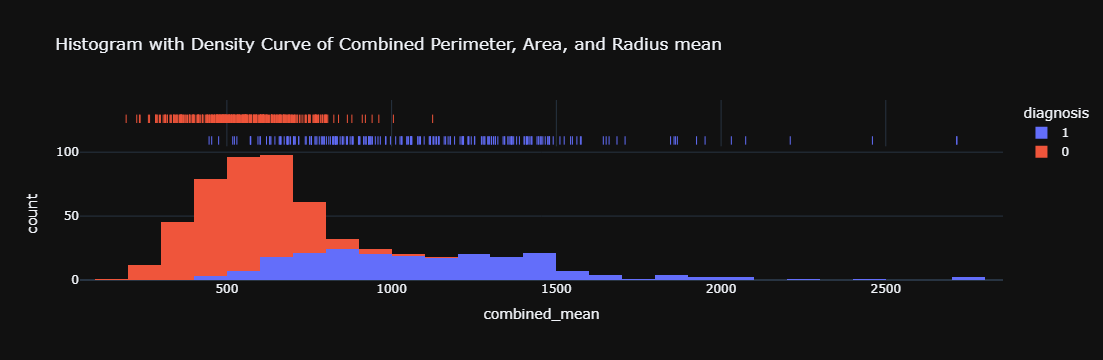

In [28]:
# Creating a new column combining perimeter_mean, area_mean, radius_mean features
df['combined_mean'] = df['perimeter_mean'] + df['area_mean'] + df['radius_mean']

# Histogram with density curve for the combined feature
fig_combined = px.histogram(df, x='combined_mean', color='diagnosis', 
                            marginal='rug',  # Adds density curve
                            title='Histogram with Density Curve of Combined Perimeter, Area, and Radius mean',
                            template='plotly_dark'  # Dark theme
                            )
fig_combined.show()

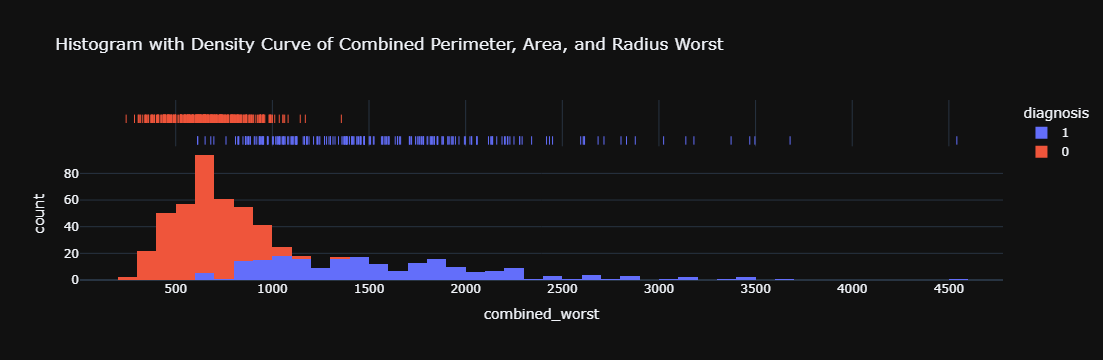

In [29]:
# Creating a new column combining perimeter_worst, area_worst, radius_worst  features
df['combined_worst'] = df['perimeter_worst'] + df['area_worst'] + df['radius_worst']

# Histogram with density curve for the combined feature
fig_combined = px.histogram(df, x='combined_worst', color='diagnosis', 
                            marginal='rug',  # Adds density curve
                            title='Histogram with Density Curve of Combined Perimeter, Area, and Radius Worst',
                            template='plotly_dark'  # Dark theme
                            )
fig_combined.show()

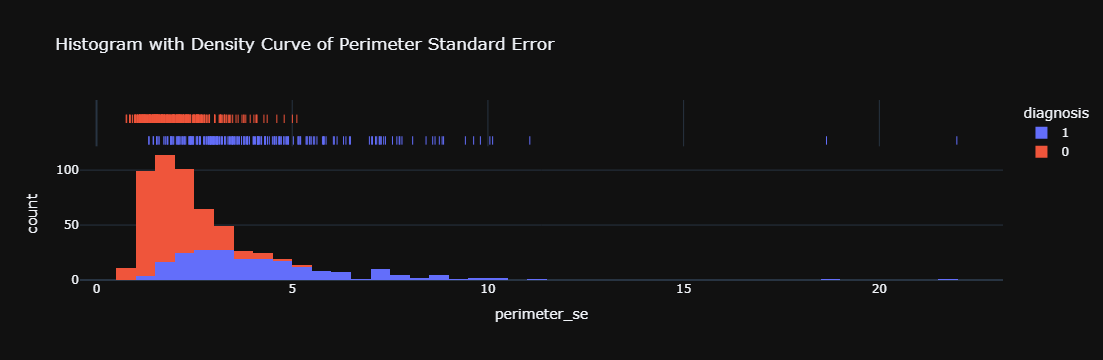

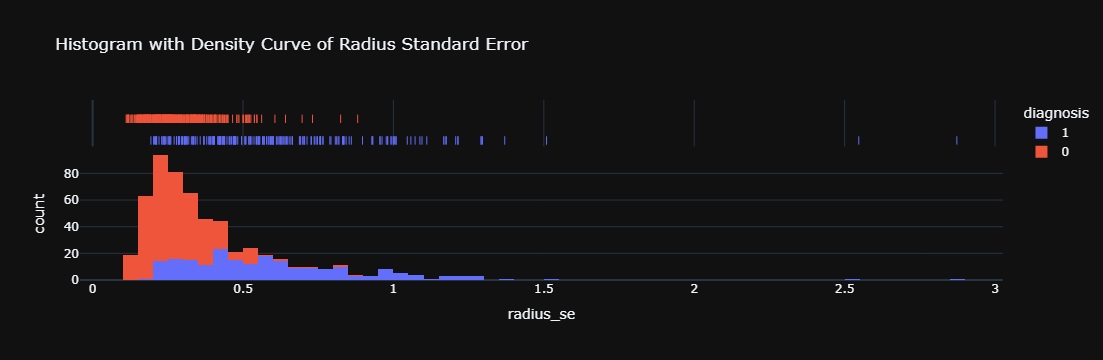

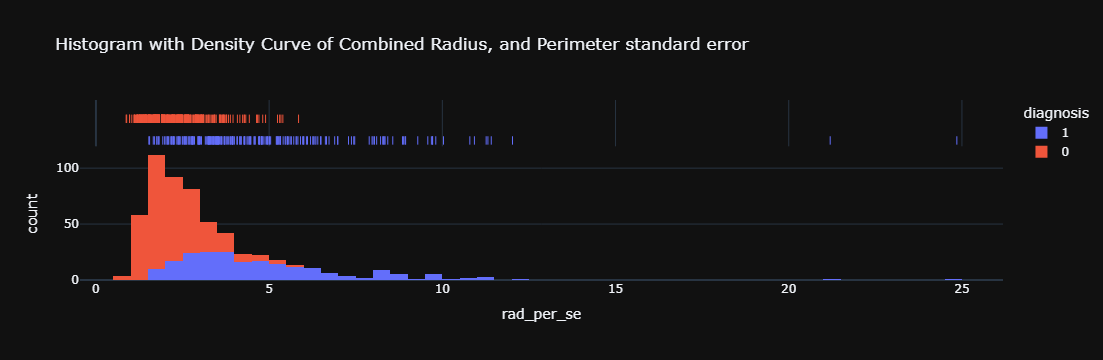

In [30]:
# Histogram with density curve for 'perimeter_se'
fig1 = px.histogram(df, x='perimeter_se', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Perimeter Standard Error',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig1.show()

# Histogram with density curve for 'radius_se'
fig2 = px.histogram(df, x='radius_se', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Radius Standard Error',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig2.show()

# Creating a new column combining perimeter_se, and radius_se features
df['rad_per_se'] = df['radius_se'] + df['perimeter_se']

# Histogram with density curve for the combined feature
fig_combined = px.histogram(df, x='rad_per_se', color='diagnosis', 
                            marginal='rug',  # Adds density curve
                            title='Histogram with Density Curve of Combined Radius, and Perimeter standard error',
                            template='plotly_dark'  # Dark theme
                            )
fig_combined.show()

In [31]:
#Obviously there is skewness in the data. Thus, I will try to handle it by using log transformation

#### Log Transformation

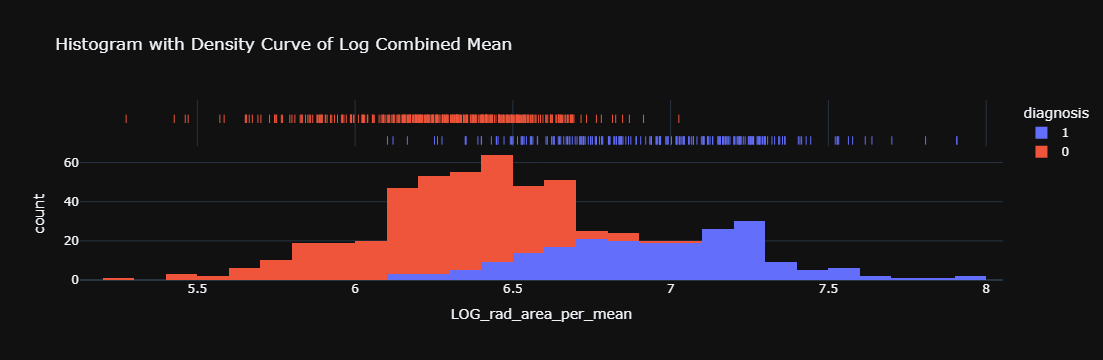

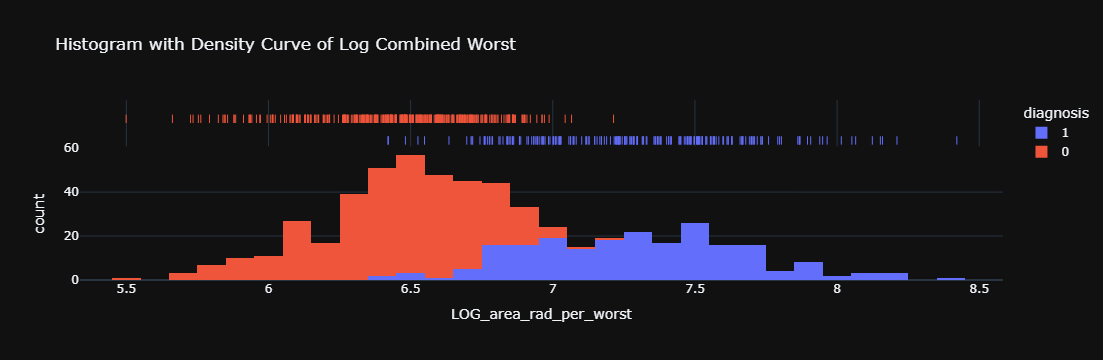

In [32]:
df['LOG_rad_area_per_mean'] = np.log1p(df['combined_mean'])  # Add 1 to avoid log(0) errors

df['LOG_area_rad_per_worst'] = np.log1p(df['combined_worst'])  # Add 1 to avoid log(0) errors

# Histogram with density curve for 'LOG_rad_area_per_mean'
fig1 = px.histogram(df, x='LOG_rad_area_per_mean', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Log Combined Mean',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig1.show()

# Histogram with density curve for 'LOG_area_rad_per_worst'
fig2 = px.histogram(df, x='LOG_area_rad_per_worst', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Log Combined Worst',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig2.show()

#### Now notice the difference, the data is closer to be normally distibuted to feed the model
#### Summary
#### Log transformation is a powerful tool in feature engineering that helps in:

 - Normalizing data distributions by reducing skewness.
 - Stabilizing variance, making data conform to model assumptions.
 - Linearizing relationships between variables for better modeling.
 - Reducing the influence of outliers, leading to more robust models.
 - Enhancing interpretability, especially in multiplicative relationships.

In [33]:
# Now I will drop df['radius_mean'] & df['area_mean'] & df['perimeter_mean'] & df['combined_mean']
# And Keep df['LOG_rad_area_per_mean]

#I will also drop df['perimeter_worst'] & df['area_worst'] & df['radius_worst'] & df['combined_worst']
# And Keep df['LOG_area_rad_per_worst']


df.drop(["radius_mean" , "area_mean" , "perimeter_mean" , "combined_mean"], axis = 1 , inplace = True)
df.drop(["perimeter_worst" , "area_worst" , "radius_worst" , "combined_worst"], axis = 1 , inplace = True)

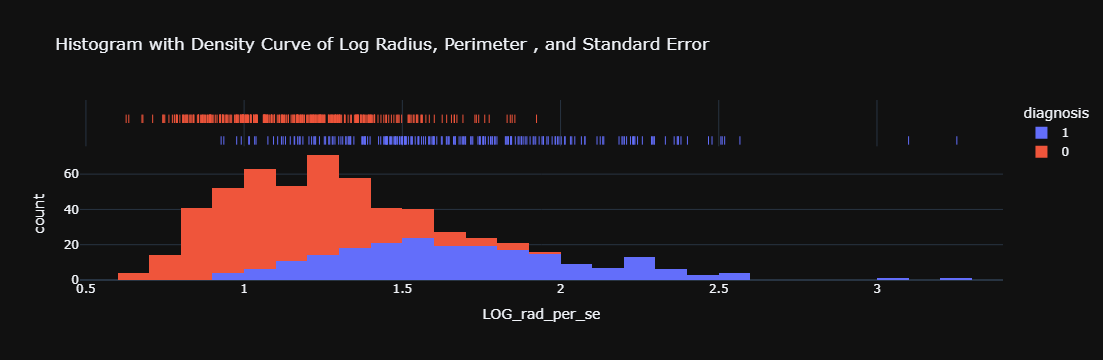

In [34]:
df['LOG_rad_per_se'] = np.log1p(df['rad_per_se'])  # Add 1 to avoid log(0) errors

# Histogram with density curve for 'LOG_rad_per_se'
fig1 = px.histogram(df, x='LOG_rad_per_se', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Log Radius, Perimeter , and Standard Error',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig1.show()

In [35]:
df.drop(["radius_se" , "rad_per_se" , "perimeter_se"], axis = 1 , inplace = True)

In [36]:
#Still more feature skewness
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'LOG_rad_area_per_mean',
       'LOG_area_rad_per_worst', 'LOG_rad_per_se'],
      dtype='object')

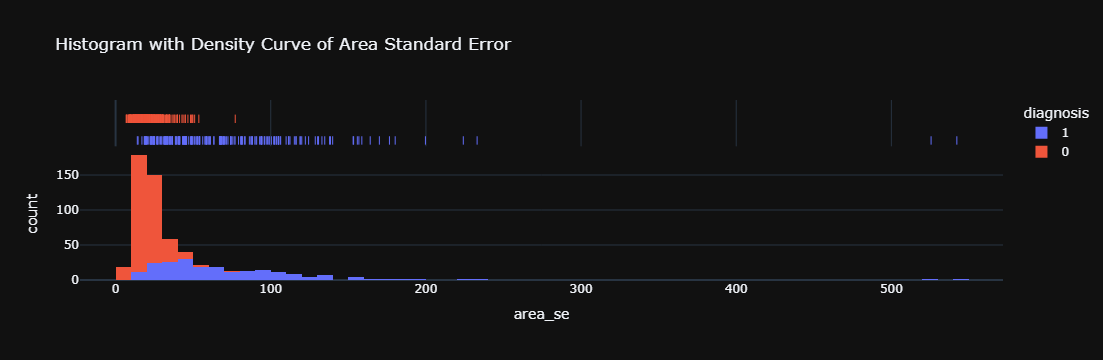

In [37]:
fig1 = px.histogram(df, x = "area_se" , color = "diagnosis",
                   marginal = "rug", # Adds density curve
                   title='Histogram with Density Curve of Area Standard Error',
                   template = "plotly_dark" # Dark theme
                   )
fig1.show()

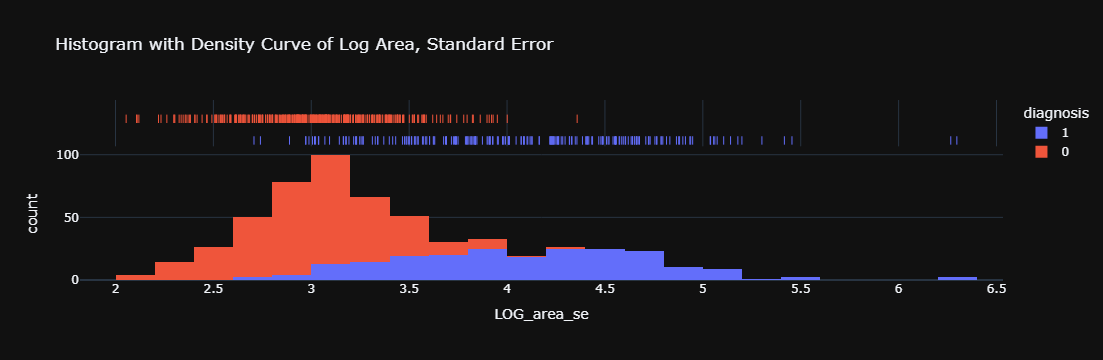

In [38]:
df['LOG_area_se'] = np.log1p(df['area_se'])  # Add 1 to avoid log(0) errors
# Histogram with density curve for 'LOG_area_se'
fig1 = px.histogram(df, x='LOG_area_se', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Log Area, Standard Error',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig1.show()

In [39]:
df.drop(['area_se'], axis = 1 , inplace = True)

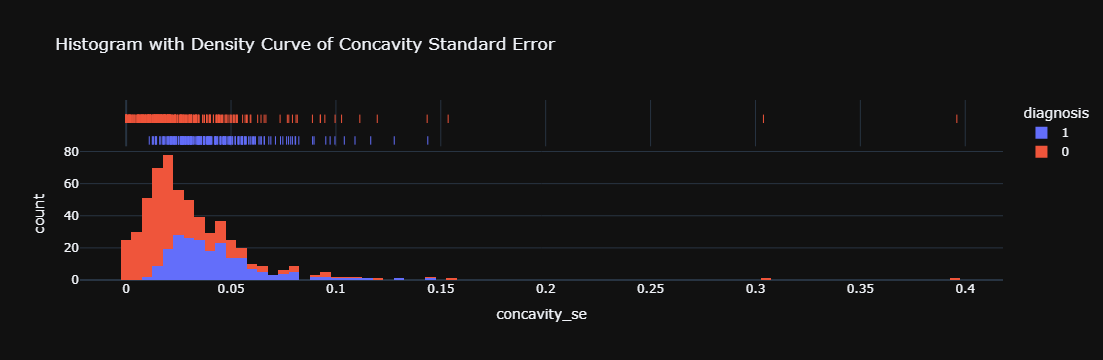

In [40]:
# Histogram with density curve for Concavity Standard Error
fig1 = px.histogram(df, x='concavity_se', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Concavity Standard Error',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig1.show()

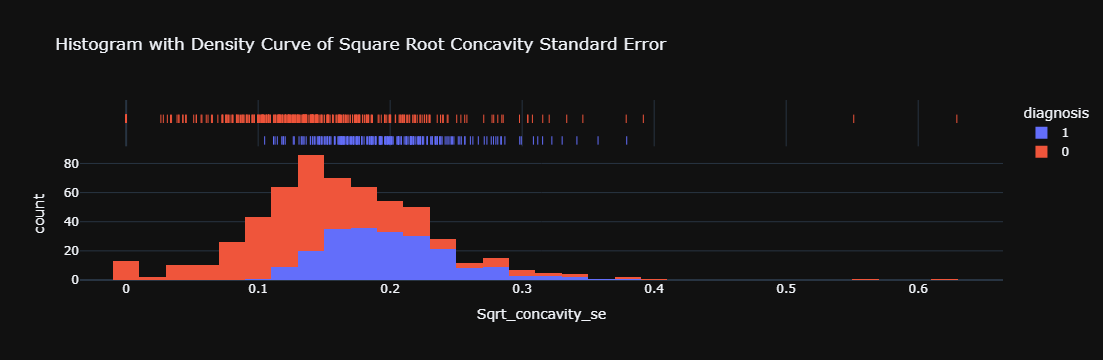

In [41]:
df['Sqrt_concavity_se'] = np.sqrt(df['concavity_se'])  
# Histogram with density curve for 'Sqrt_concavity_se'
fig1 = px.histogram(df, x='Sqrt_concavity_se', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Square Root Concavity Standard Error',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig1.show()

In [42]:
df.drop(['concavity_se'], axis = 1 , inplace = True)

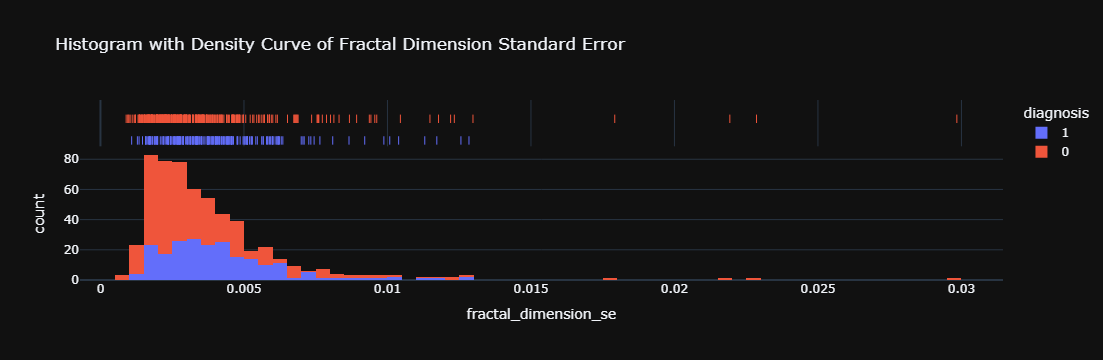

In [43]:
# Histogram with density curve for Fractal Dimension Standard Error
fig1 = px.histogram(df, x='fractal_dimension_se', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Fractal Dimension Standard Error',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig1.show()

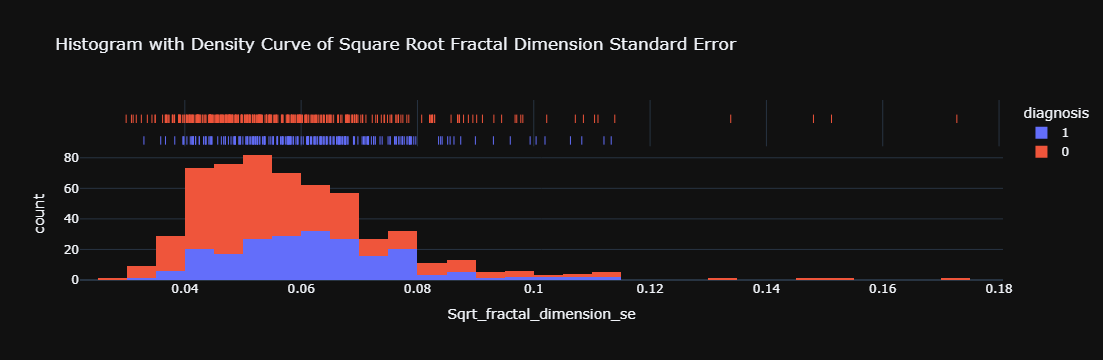

In [44]:
df['Sqrt_fractal_dimension_se'] = np.sqrt(df['fractal_dimension_se'])  
# Histogram with density curve for 'Sqrt_fractal_dimension_se'
fig1 = px.histogram(df, x='Sqrt_fractal_dimension_se', color='diagnosis', 
                    marginal='rug',  # Adds density curve
                    title='Histogram with Density Curve of Square Root Fractal Dimension Standard Error',
                     template='plotly_dark'  # Dark theme
                    
                    )
fig1.show()

In [45]:
df.drop(['fractal_dimension_se'], axis=1, inplace=True)

#### Transformations Summary:

 - Log Transformation: I applied this transformation to features with highly skewed data, particularly where there are large values or a multiplicative relationship. The log transformation helps in compressing the range of values and reducing skewness, making the data more suitable for modeling. For instance, I used log transformation for features like area_se to handle extreme values and achieve a more normalized distribution.

 - Square Root Transformation: I used this transformation for features that were moderately skewed, where a milder adjustment was sufficient to reduce skewness without overly compressing the data. This approach was applied to features like Fractal Dimension Standard Error and Concavity Standard Error, where the skewness was present but not as extreme as in other features. The square root transformation provided a balanced normalization while preserving more of the original data structure.

 This strategy ensured that the data transformations were tailored to the specific characteristics of each feature, optimizing their distributions for better performance in modeling.

### 7. Target Column Separation

In [62]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
scaler = RobustScaler(quantile_range=(20, 80))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### Target Column Separation and Data Scaling
Target Column Separation:

- I separated the target column diagnosis from the feature columns.
- x contains all features, and y contains the target values.
Data Splitting:

- The dataset is split into training and testing sets using an 80-20 split.
- x_train and y_train are used for training the model.
- x_test and y_test are used for evaluating the model.
Data Scaling:

- I used RobustScaler to normalize the data.
- RobustScaler removes the median and scales according to the interquartile range (IQR), making it robust to outliers.
The scaler is fit on the training data and then used to transform both training and testing data.
This process ensures that the data is prepared for modeling, with robust scaling applied to handle outliers effectively.

#### Multicollinearity: Variance Inflation Factor

Imagine you're trying to find out how well a plant grows based on two types of fertilizers.

- One way: You could measure the plant’s growth and compare it directly to how much fertilizer you used.
- Another way: You could look at the plant’s growth and the amount of sunlight it received. But if both fertilizers and sunlight are highly related (e.g., both promote plant growth in similar ways), knowing just the amount of sunlight might be enough to estimate the effect of the fertilizer.

In this case, knowing both fertilizer and sunlight isn’t providing much additional information because they are closely related in their effects. This is similar to multicollinearity in statistics, where having multiple predictors that provide overlapping information can make it hard to determine the unique contribution of each predictor.

In [48]:
#I will calculate the Variance Inflation Factor for each variable.

In [49]:
# the independent variables set
X = df.drop('diagnosis', axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                      feature           VIF
0                texture_mean    259.409606
1             smoothness_mean    369.891654
2            compactness_mean    120.382218
3              concavity_mean    101.267631
4         concave points_mean    118.506922
5               symmetry_mean    182.442040
6      fractal_dimension_mean    807.117921
7                  texture_se     25.653199
8               smoothness_se     25.825652
9              compactness_se     48.323012
10          concave points_se     44.864975
11                symmetry_se     38.331149
12              texture_worst    360.371245
13           smoothness_worst    380.732201
14          compactness_worst    132.240161
15            concavity_worst     89.211331
16       concave points_worst    142.711919
17             symmetry_worst    219.898174
18    fractal_dimension_worst    527.287901
19      LOG_rad_area_per_mean  17498.470515
20     LOG_area_rad_per_worst  23768.883224
21             LOG_rad_per_se   

### Interpreting VIF
- VIF = 1: Indicates no correlation between the predictor and other predictors. All VIF values in the data are much higher than 1.

 - VIF between 1 and 5: Indicates moderate correlation, generally acceptable. All VIF values are significantly higher than 5, indicating strong correlation.

- VIF greater than 5: Indicates high correlation, suggesting potential multicollinearity issues. In this case, many features have VIF values far exceeding 5.

### VIF Analysis for my Data
From my results:

- Very High VIF Values: Features like LOG_rad_area_per_mean (17,498.47), LOG_area_rad_per_worst (23,768.88), and fractal_dimension_mean (807.12) have extremely high VIF values, indicating severe multicollinearity.

- High VIF Values: Many other features, such as texture_mean (259.41), smoothness_mean (369.89), and fractal_dimension_worst (527.29), also have high VIFs, suggesting that they are highly correlated with other features.

- To adress high VIF, techniques like Principal Component Analysis (PCA)  would be applied to reduce the dimensionality of my dataset. This can help mitigate multicollinearity by transforming your features into a set of uncorrelated principal components.

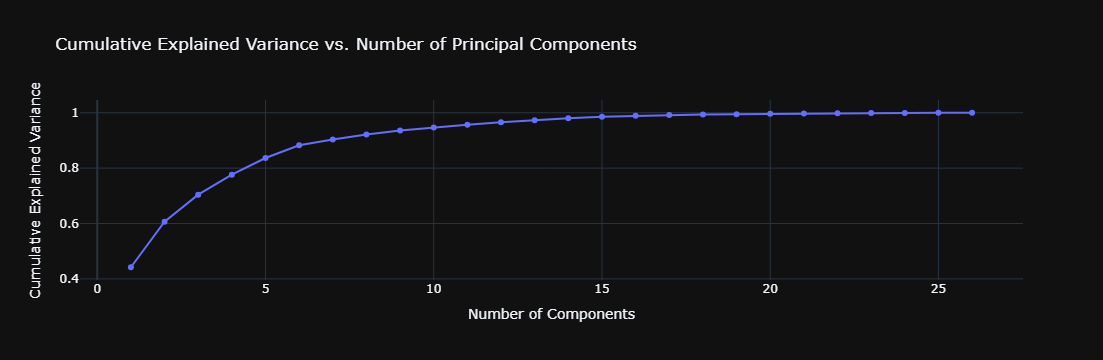

In [50]:
# Addressing High VIF : Dimensionality Reduction PCA

# I will Select the number of components that captures a sufficient amount of variance (e.g., 95%).

# Sample data
data = df.drop('diagnosis', axis=1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

pca = PCA()
pca.fit(data_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_var_ratio = np.cumsum(explained_variance_ratio)

# Plotting the cumulative explained variance
pca_df = pd.DataFrame({
    'Number of Components': range(1, len(cumulative_var_ratio) + 1),
    'Cumulative Explained Variance': cumulative_var_ratio
})

# I will use plotly to plot a line figure
fig = px.line(
    pca_df,
    x='Number of Components',
    y='Cumulative Explained Variance',
    title='Cumulative Explained Variance vs. Number of Principal Components',
    markers=True,
    template='plotly_dark',  # Dark theme 
)


fig.show()

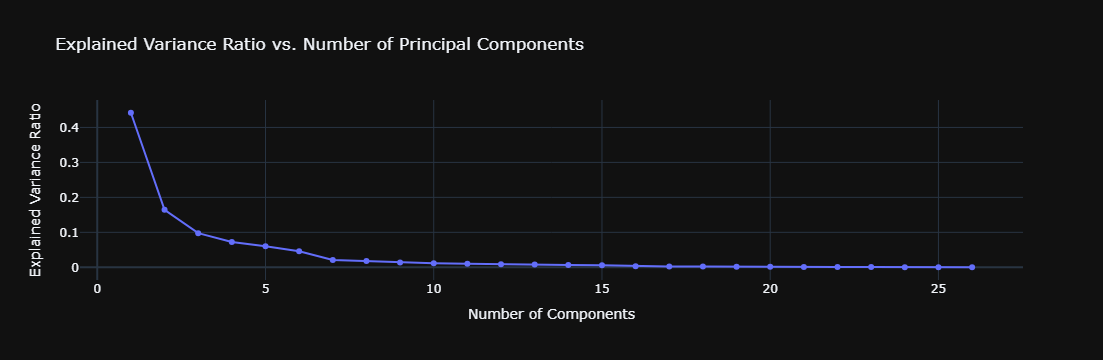

In [51]:
# Plotting the Explained variance ratio
pca_df = pd.DataFrame({
    'Number of Components': range(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# I will use plotly to plot a line figure
fig = px.line(
    pca_df,
    x='Number of Components',
    y='Explained Variance Ratio',
    title='Explained Variance Ratio vs. Number of Principal Components',
    markers=True,
    template='plotly_dark',  # Dark theme 
)


fig.show()

In [52]:
# Sample data
data = df.drop('diagnosis', axis=1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Creating a PCA object
pca = PCA(n_components=10)  # Specify the number of components

# Fitting the PCA model to the data
pca.fit(data_scaled)

# Transforming the data to the new dimension
principal_components = pca.transform(data_scaled)

# Creating column names based on principal components
column_names = [f'PC{i+1}' for i in range(pca.n_components_)]  # Dynamic naming

# Creating a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=column_names)

(principal_df)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     8.461149  1.074800 -2.156904 -2.766585  1.583349  1.407753 -1.856902   
1     0.800127 -3.074362 -0.284998 -1.317324  0.023040 -0.040051 -0.593012   
2     4.940109 -1.713836 -0.312606 -1.106543  0.638881  0.436350  0.230585   
3    10.059120  7.380664 -3.656116  1.790688  2.443679  3.078306 -0.576590   
4     2.807097 -1.522432  1.049632 -3.370971  0.424649 -1.412706  0.407217   
..         ...       ...       ...       ...       ...       ...       ...   
564   4.245040 -3.209733  2.210600 -1.837459  0.323424 -2.482844  0.469452   
565   2.336524 -3.641343  2.988447  1.628778  0.371738 -0.340082 -0.100050   
566   1.130475 -2.496428  1.425117  1.057908 -1.966187 -0.429238  0.324204   
567   9.889348 -0.243468 -0.925634  2.243189 -0.531140  0.676531 -0.521523   
568  -5.330195  0.036572  1.513953  2.407388 -0.044786  1.697463 -0.970031   

          PC8       PC9      PC10  
0    0.343475 -0.701060  0.168608  
1    0.819195  0.686905  0.981443  
2    0.086226  0.385547 -0.264096  
3    1.516245 -1.515953 -0.617382  
4    0.809694  0.239331  0.431619  
..        ...       ...       ...  
564 -0.282233  0.583357  0.016375  
565 -1.090575 -0.239762  0.325348  
566  0.492948  0.751311 -0.107948  
567 -0.471740 -0.272995 -1.166398  
568  1.596509  0.316572 -0.214801  

[569 rows x 10 columns]

### Evaluation Metrics and Validation

- Validation is crucial to ensure a model's reliability and ability to generalize to unseen data. By testing the model on a separate dataset (validation set), we assess its performance beyond the training data. This helps in avoiding overfitting, where the model might perform well on the training data but fail on new data.

### Importance of Validation:
- Avoiding Overfitting: Detects and mitigates overfitting by evaluating on unseen data.
- Model Selection: Helps in comparing models and tuning hyperparameters.
- Reliable Performance Estimates: Ensures the model performs well in real world scenarios.

### Validation Methods Highlighted:
- Cross-Validation: I used standard cross-validation through GridSearchCV with cv=5, which divides the data into five folds to ensure robust and reliable performance metrics.
- Stratified Cross-Validation: Not explicitly used but could be applied to handle imbalanced data, maintaining class distribution across folds.



### Evaluating Model With PCA data

In [71]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(principal_df, y, test_size=0.2, random_state=42)

In [72]:
log_reg_pca = LogisticRegression(C= 1, max_iter= 1000, penalty= 'l2', solver= 'liblinear')
log_reg_pca.fit(x_train, y_train)
predcs_pca = log_reg_pca.predict(x_test)
print(classification_report(y_test, predcs_pca))
print("\n")
print('f1_score ',f1_score(y_test, predcs_pca))
print('accuracy_score ',accuracy_score(y_test, predcs_pca))
print("\n")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



f1_score  0.9882352941176471
accuracy_score  0.9912280701754386




### Selection of the Model

In [55]:
models = list()
models.append(("LR" , LogisticRegression(random_state=79) ))
models.append(("DT" , DecisionTreeClassifier(random_state=79)))
models.append(("KNN" , KNeighborsClassifier(n_neighbors=11)))
models.append(("RF" , RandomForestClassifier(n_estimators=100, random_state=42)))
models.append(("xg" , XGBClassifier(random_state=79)))
models.append(("GB" , GradientBoostingClassifier(random_state=79)))

In [56]:
for item in models:
  model = item[1]
  model.fit(x_train, y_train)
  preds = model.predict(x_test)
  print(item[0], classification_report(y_test, preds))
  print("\n")
  print('f1_score ',f1_score(y_test, preds))
  print('accuracy_score ',accuracy_score(y_test, preds))
  print("\n")

LR               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



f1_score  0.9767441860465116
accuracy_score  0.9824561403508771


DT               precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



f1_score  0.9069767441860465
accuracy_score  0.9298245614035088


KNN               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                        

- The above code compares the performance of different classification models (Logistic Regression, Decision Tree, K-Nearest Neighbors, Random Forest, XGBoost, and Gradient Boosting) on a test dataset. 
- Each model was trained on the training data and then evaluated on the test data.
- The performance metrics reported include precision, recall, f1-score, and accuracy.
- Logistic Regression and K-Nearest Neighbors achieved the highest accuracy at approximately 98% and 96%, respectively.
- The Decision Tree classifier performed slightly worse, with an accuracy of about 93%.
- Random Forest, XGBoost, and Gradient Boosting models all showed similar performance, with accuracy around 96%, indicating that ensemble methods tend to perform well on this dataset.


### Hyper Parameters Tuning

In [57]:
# Defining the parameter grid
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : [.01, 0.1, 1, 5, 10],
    'solver' : ['liblinear','saga'],
    'max_iter' : [10000]
    }
]

# Creating the logistic regression model
logistic_regression = LogisticRegression(max_iter=10000)

# Creating the grid search object
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy' )

# Fitting the grid search to the data
grid_search.fit(x_train, y_train)

# Printing the best parameters
print(grid_search.best_params_)

# Printing the best score
print(grid_search.best_score_)

{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear'}
0.9802197802197803


### GridSearchCV identified the best hyperparameters for the Logistic Regression model:
- C: 1 (optimal regularization strength)
- penalty: 'l2' (L2 regularization for a balanced model)
- solver: 'liblinear' (effective for this dataset)
- max_iter: 10000 (ensures convergence)
- The best model achieved an accuracy of 98.02% during cross-validation.


### Final Output

In [58]:
log_reg = LogisticRegression(C= 1, max_iter= 1000, penalty= 'l2', solver= 'liblinear')
log_reg.fit(x_train, y_train)
predcs = log_reg.predict(x_test)
print(classification_report(y_test, predcs))
print("\n")
print('f1_score ',f1_score(y_test, predcs))
print('accuracy_score ',accuracy_score(y_test, predcs))
print("\n")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



f1_score  0.9882352941176471
accuracy_score  0.9912280701754386




- The final Logistic Regression model, optimized with C=1, penalty='l2', and solver='liblinear', achieved excellent results:

- F1-Score: 0.99
- Accuracy: 99.12%

These metrics indicate that the model is highly effective and accurate in classifying the test data.

### I'm going to deploy this model on Streamlit, so I should save the scaler and the trained model (LR) to a file that I can load later for deployment.
- This can be done by joblib or pickle. However, I'm going to use pickle

In [61]:
import pickle

# Save the RobustScaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the StandardScaler used before PCA
with open('pca_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the PCA object
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)

# Save the model to a file
with open('log_reg.pkl', 'wb') as f:
    pickle.dump(log_reg, f)